# <center>NBA Portfolio</center>

## Import Libraries

In [584]:
# Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from scikitplot.metrics import plot_silhouette
from scikitplot.cluster import plot_elbow_curve 

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Table of Contents

    1.0 Load Dataset
    2.0 EDA
    3.0 Feature Engineering
    4.0 Data Visualization
    5.0 Modelling
    6.0 Analysis
    7.0 Deep Learning

# 1.0 Load Dataset

All of my data comes from https://www.basketball-reference.com/ and https://www.sportingnews.com/ca/nba?gr=www

Load 11 datasets and join then all together
- These are the total stats for each season for a total of 11 seasons

In [2]:
df = pd.read_csv('player_season/2011-2012.csv')

df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Jeff Adrien,PF,25,HOU,8,0,63,7,16,...,5,17,22,1,0,2,2,13,21,adrieje01
1,2,Arron Afflalo,SG,26,DEN,62,62,2086,329,699,...,40,157,197,149,36,13,85,134,943,afflaar01
2,3,Blake Ahearn,PG,27,UTA,4,0,30,4,14,...,0,2,2,1,0,0,5,4,10,ahearbl01
3,4,Solomon Alabi,C,23,TOR,14,0,122,13,36,...,15,32,47,3,2,9,5,11,33,alabiso01
4,5,Cole Aldrich,C,23,OKC,26,0,173,22,42,...,13,35,48,3,8,16,9,22,57,aldrico01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,Nick Young,SG,26,LAC,22,3,518,76,193,...,11,25,36,10,14,6,24,51,214,youngni01
547,548,Sam Young,SF,26,TOT,35,2,375,45,127,...,20,42,62,15,17,6,16,23,114,youngsa01
548,549,Sam Young,SF,26,MEM,21,2,240,32,83,...,14,27,41,9,11,2,9,12,74,youngsa01
549,550,Sam Young,SF,26,PHI,14,0,135,13,44,...,6,15,21,6,6,4,7,11,40,youngsa01


In [3]:
# add the season in which the players played in
season_2012 = 2012

df['SZN'] = season_2012
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Jeff Adrien,PF,25,HOU,8,0,63,7,16,...,17,22,1,0,2,2,13,21,adrieje01,2012
1,2,Arron Afflalo,SG,26,DEN,62,62,2086,329,699,...,157,197,149,36,13,85,134,943,afflaar01,2012
2,3,Blake Ahearn,PG,27,UTA,4,0,30,4,14,...,2,2,1,0,0,5,4,10,ahearbl01,2012
3,4,Solomon Alabi,C,23,TOR,14,0,122,13,36,...,32,47,3,2,9,5,11,33,alabiso01,2012
4,5,Cole Aldrich,C,23,OKC,26,0,173,22,42,...,35,48,3,8,16,9,22,57,aldrico01,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,Nick Young,SG,26,LAC,22,3,518,76,193,...,25,36,10,14,6,24,51,214,youngni01,2012
547,548,Sam Young,SF,26,TOT,35,2,375,45,127,...,42,62,15,17,6,16,23,114,youngsa01,2012
548,549,Sam Young,SF,26,MEM,21,2,240,32,83,...,27,41,9,11,2,9,12,74,youngsa01,2012
549,550,Sam Young,SF,26,PHI,14,0,135,13,44,...,15,21,6,6,4,7,11,40,youngsa01,2012


In [4]:
df2 = pd.read_csv('player_season/2012-2013.csv')

df2

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,30,47,77,11,13,15,17,53,116,acyqu01
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,68,128,196,36,18,27,32,80,209,adrieje01
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,29,210,239,206,40,11,138,137,1057,afflaar01
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,...,0,1,1,1,0,0,0,3,5,akognjo01
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,...,30,90,120,9,5,23,23,60,100,aldrico01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,465,Nick Young,SG,27,PHI,59,17,1411,224,542,...,24,106,130,84,36,14,50,84,628,youngni01
569,466,Sam Young,SG,27,IND,56,3,693,58,148,...,26,97,123,42,15,8,33,62,155,youngsa01
570,467,Thaddeus Young,PF,24,PHI,76,76,2629,509,958,...,182,389,571,125,133,55,90,191,1127,youngth01
571,468,Luke Zeller,C,25,PHO,16,0,58,9,26,...,1,9,10,3,0,0,0,5,19,zellelu01


In [5]:
season_2013 = 2013

df2['SZN'] = season_2013
df2

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,47,77,11,13,15,17,53,116,acyqu01,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,128,196,36,18,27,32,80,209,adrieje01,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,210,239,206,40,11,138,137,1057,afflaar01,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,...,1,1,1,0,0,0,3,5,akognjo01,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,...,90,120,9,5,23,23,60,100,aldrico01,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,465,Nick Young,SG,27,PHI,59,17,1411,224,542,...,106,130,84,36,14,50,84,628,youngni01,2013
569,466,Sam Young,SG,27,IND,56,3,693,58,148,...,97,123,42,15,8,33,62,155,youngsa01,2013
570,467,Thaddeus Young,PF,24,PHI,76,76,2629,509,958,...,389,571,125,133,55,90,191,1127,youngth01,2013
571,468,Luke Zeller,C,25,PHO,16,0,58,9,26,...,9,10,3,0,0,0,5,19,zellelu01,2013


In [6]:
df3 = pd.read_csv('player_season/2013-2014.csv')

df3

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,72,144,216,28,23,26,30,122,171,acyqu01
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,5,10,15,4,4,3,2,8,19,acyqu01
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,67,134,201,24,19,23,28,114,152,acyqu01
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,142,190,332,43,40,57,71,203,265,adamsst01
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,102,204,306,38,24,36,39,108,362,adrieje01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,478,Tony Wroten,PG,20,PHI,72,16,1765,345,808,...,69,159,228,217,78,16,204,151,939,wroteto01
607,479,Nick Young,SG,28,LAL,64,9,1810,387,889,...,29,137,166,95,46,12,95,156,1144,youngni01
608,480,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,...,166,310,476,182,167,36,165,213,1417,youngth01
609,481,Cody Zeller,C,21,CHA,82,3,1416,172,404,...,118,235,353,92,40,41,87,170,490,zelleco01


In [7]:
season_2014 = 2014

df3['SZN'] = season_2014
df3

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,...,144,216,28,23,26,30,122,171,acyqu01,2014
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,...,10,15,4,4,3,2,8,19,acyqu01,2014
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,...,134,201,24,19,23,28,114,152,acyqu01,2014
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,...,190,332,43,40,57,71,203,265,adamsst01,2014
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,...,204,306,38,24,36,39,108,362,adrieje01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,478,Tony Wroten,PG,20,PHI,72,16,1765,345,808,...,159,228,217,78,16,204,151,939,wroteto01,2014
607,479,Nick Young,SG,28,LAL,64,9,1810,387,889,...,137,166,95,46,12,95,156,1144,youngni01,2014
608,480,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,...,310,476,182,167,36,165,213,1417,youngth01,2014
609,481,Cody Zeller,C,21,CHA,82,3,1416,172,404,...,235,353,92,40,41,87,170,490,zelleco01,2014


In [8]:
df4 = pd.read_csv('player_season/2014-2015.csv')

df4

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,...,79,222,301,68,27,22,60,147,398,acyqu01
1,2,Jordan Adams,SG,20,MEM,30,0,248,35,86,...,9,19,28,16,16,7,14,24,94,adamsjo01
2,3,Steven Adams,C,21,OKC,70,67,1771,217,399,...,199,324,523,66,38,86,99,222,537,adamsst01
3,4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,...,23,54,77,15,4,9,9,30,60,adrieje01
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,...,27,220,247,129,41,7,116,167,1035,afflaar01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,490,Thaddeus Young,PF,26,TOT,76,68,2434,451,968,...,127,284,411,173,124,25,117,171,1071,youngth01
647,490,Thaddeus Young,PF,26,MIN,48,48,1605,289,641,...,75,170,245,135,86,17,75,115,685,youngth01
648,490,Thaddeus Young,PF,26,BRK,28,20,829,162,327,...,52,114,166,38,38,8,42,56,386,youngth01
649,491,Cody Zeller,C,22,CHO,62,45,1487,172,373,...,97,265,362,100,34,49,62,156,472,zelleco01


In [9]:
season_2015 = 2015

df4['SZN'] = season_2015
df4

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,...,222,301,68,27,22,60,147,398,acyqu01,2015
1,2,Jordan Adams,SG,20,MEM,30,0,248,35,86,...,19,28,16,16,7,14,24,94,adamsjo01,2015
2,3,Steven Adams,C,21,OKC,70,67,1771,217,399,...,324,523,66,38,86,99,222,537,adamsst01,2015
3,4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,...,54,77,15,4,9,9,30,60,adrieje01,2015
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,...,220,247,129,41,7,116,167,1035,afflaar01,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,490,Thaddeus Young,PF,26,TOT,76,68,2434,451,968,...,284,411,173,124,25,117,171,1071,youngth01,2015
647,490,Thaddeus Young,PF,26,MIN,48,48,1605,289,641,...,170,245,135,86,17,75,115,685,youngth01,2015
648,490,Thaddeus Young,PF,26,BRK,28,20,829,162,327,...,114,166,38,38,8,42,56,386,youngth01,2015
649,491,Cody Zeller,C,22,CHO,62,45,1487,172,373,...,265,362,100,34,49,62,156,472,zelleco01,2015


In [10]:
df5 = pd.read_csv('player_season/2015-2016.csv')

df5

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Quincy Acy,PF,25,SAC,59,29,876,119,214,...,65,123,188,27,29,24,27,103,307,acyqu01
1,2,Jordan Adams,SG,21,MEM,2,0,15,2,6,...,0,2,2,3,3,0,2,2,7,adamsjo01
2,3,Steven Adams,C,22,OKC,80,80,2014,261,426,...,219,314,533,62,42,89,84,223,636,adamsst01
3,4,Arron Afflalo,SG,30,NYK,71,57,2371,354,799,...,23,243,266,144,25,10,82,142,909,afflaar01
4,5,Alexis Ajinça,C,27,NOP,59,17,861,150,315,...,75,194,269,31,19,36,54,134,352,ajincal01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,472,Joe Young,PG,23,IND,41,0,384,62,169,...,6,44,50,65,15,0,33,30,154,youngjo01
574,473,Nick Young,SG,30,LAL,54,2,1033,126,372,...,14,83,97,34,23,7,30,50,392,youngni01
575,474,Thaddeus Young,PF,27,BRK,73,73,2407,495,963,...,176,484,660,136,112,37,136,182,1102,youngth01
576,475,Cody Zeller,C,23,CHO,73,60,1774,231,437,...,138,317,455,71,57,63,68,204,638,zelleco01


In [11]:
season_2016 = 2016

df5['SZN'] = season_2016
df5

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Quincy Acy,PF,25,SAC,59,29,876,119,214,...,123,188,27,29,24,27,103,307,acyqu01,2016
1,2,Jordan Adams,SG,21,MEM,2,0,15,2,6,...,2,2,3,3,0,2,2,7,adamsjo01,2016
2,3,Steven Adams,C,22,OKC,80,80,2014,261,426,...,314,533,62,42,89,84,223,636,adamsst01,2016
3,4,Arron Afflalo,SG,30,NYK,71,57,2371,354,799,...,243,266,144,25,10,82,142,909,afflaar01,2016
4,5,Alexis Ajinça,C,27,NOP,59,17,861,150,315,...,194,269,31,19,36,54,134,352,ajincal01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,472,Joe Young,PG,23,IND,41,0,384,62,169,...,44,50,65,15,0,33,30,154,youngjo01,2016
574,473,Nick Young,SG,30,LAL,54,2,1033,126,372,...,83,97,34,23,7,30,50,392,youngni01,2016
575,474,Thaddeus Young,PF,27,BRK,73,73,2407,495,963,...,484,660,136,112,37,136,182,1102,youngth01,2016
576,475,Cody Zeller,C,23,CHO,73,60,1774,231,437,...,317,455,71,57,63,68,204,638,zelleco01,2016


In [12]:
df6 = pd.read_csv('player_season/2016-2017.csv')

df6

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Álex Abrines,SG,23,OKC,68,6,1055,134,341,...,18,68,86,40,37,8,33,114,406,abrinal01
1,2,Quincy Acy,PF,26,TOT,38,1,558,70,170,...,20,95,115,18,14,15,21,67,222,acyqu01
2,2,Quincy Acy,PF,26,DAL,6,0,48,5,17,...,2,6,8,0,0,0,2,9,13,acyqu01
3,2,Quincy Acy,PF,26,BRK,32,1,510,65,153,...,18,89,107,18,14,15,19,58,209,acyqu01
4,3,Steven Adams,C,23,OKC,80,80,2389,374,655,...,281,332,613,86,89,78,146,195,905,adamsst01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,482,Cody Zeller,C,24,CHO,62,58,1725,253,443,...,135,270,405,99,62,58,65,189,639,zelleco01
591,483,Tyler Zeller,C,27,BOS,51,5,525,78,158,...,43,81,124,42,7,21,20,61,178,zellety01
592,484,Stephen Zimmerman,C,20,ORL,19,0,108,10,31,...,11,24,35,4,2,5,3,17,23,zimmest01
593,485,Paul Zipser,SF,22,CHI,44,18,843,88,221,...,15,110,125,36,15,16,40,78,240,zipsepa01


In [13]:
season_2017 = 2017

df6['SZN'] = season_2017
df6

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Álex Abrines,SG,23,OKC,68,6,1055,134,341,...,68,86,40,37,8,33,114,406,abrinal01,2017
1,2,Quincy Acy,PF,26,TOT,38,1,558,70,170,...,95,115,18,14,15,21,67,222,acyqu01,2017
2,2,Quincy Acy,PF,26,DAL,6,0,48,5,17,...,6,8,0,0,0,2,9,13,acyqu01,2017
3,2,Quincy Acy,PF,26,BRK,32,1,510,65,153,...,89,107,18,14,15,19,58,209,acyqu01,2017
4,3,Steven Adams,C,23,OKC,80,80,2389,374,655,...,332,613,86,89,78,146,195,905,adamsst01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,482,Cody Zeller,C,24,CHO,62,58,1725,253,443,...,270,405,99,62,58,65,189,639,zelleco01,2017
591,483,Tyler Zeller,C,27,BOS,51,5,525,78,158,...,81,124,42,7,21,20,61,178,zellety01,2017
592,484,Stephen Zimmerman,C,20,ORL,19,0,108,10,31,...,24,35,4,2,5,3,17,23,zimmest01,2017
593,485,Paul Zipser,SF,22,CHI,44,18,843,88,221,...,110,125,36,15,16,40,78,240,zipsepa01,2017


In [14]:
df7 = pd.read_csv('player_season/2017-2018.csv')

df7

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Álex Abrines,SG,24,OKC,75,8,1134,115,291,...,26,88,114,28,38,8,25,124,353,abrinal01
1,2,Quincy Acy,PF,27,BRK,70,8,1359,130,365,...,40,217,257,57,33,29,60,149,411,acyqu01
2,3,Steven Adams,C,24,OKC,76,76,2487,448,712,...,384,301,685,88,92,78,128,215,1056,adamsst01
3,4,Bam Adebayo,C,20,MIA,69,19,1368,174,340,...,118,263,381,101,32,41,66,138,477,adebaba01
4,5,Arron Afflalo,SG,32,ORL,53,3,682,65,162,...,4,62,66,30,4,9,21,56,179,afflaar01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,537,Tyler Zeller,C,28,BRK,42,33,703,125,229,...,63,131,194,28,8,21,35,78,300,zellety01
660,537,Tyler Zeller,C,28,MIL,24,1,406,62,105,...,47,64,111,19,7,14,12,48,141,zellety01
661,538,Paul Zipser,SF,23,CHI,54,12,824,81,234,...,13,118,131,46,20,15,43,86,218,zipsepa01
662,539,Ante Žižić,C,21,CLE,32,2,214,49,67,...,24,36,60,5,2,13,11,30,119,zizican01


In [15]:
season_2018 = 2018

df7['SZN'] = season_2018
df7

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Álex Abrines,SG,24,OKC,75,8,1134,115,291,...,88,114,28,38,8,25,124,353,abrinal01,2018
1,2,Quincy Acy,PF,27,BRK,70,8,1359,130,365,...,217,257,57,33,29,60,149,411,acyqu01,2018
2,3,Steven Adams,C,24,OKC,76,76,2487,448,712,...,301,685,88,92,78,128,215,1056,adamsst01,2018
3,4,Bam Adebayo,C,20,MIA,69,19,1368,174,340,...,263,381,101,32,41,66,138,477,adebaba01,2018
4,5,Arron Afflalo,SG,32,ORL,53,3,682,65,162,...,62,66,30,4,9,21,56,179,afflaar01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,537,Tyler Zeller,C,28,BRK,42,33,703,125,229,...,131,194,28,8,21,35,78,300,zellety01,2018
660,537,Tyler Zeller,C,28,MIL,24,1,406,62,105,...,64,111,19,7,14,12,48,141,zellety01,2018
661,538,Paul Zipser,SF,23,CHI,54,12,824,81,234,...,118,131,46,20,15,43,86,218,zipsepa01,2018
662,539,Ante Žižić,C,21,CLE,32,2,214,49,67,...,36,60,5,2,13,11,30,119,zizican01,2018


In [16]:
df8 = pd.read_csv('player_season/2018-2019.csv')

df8

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Álex Abrines,SG,25,OKC,31,2,588,56,157,...,5,43,48,20,17,6,14,53,165,abrinal01
1,2,Quincy Acy,PF,28,PHO,10,0,123,4,18,...,3,22,25,8,1,4,4,24,17,acyqu01
2,3,Jaylen Adams,PG,22,ATL,34,1,428,38,110,...,11,49,60,65,14,5,28,45,108,adamsja01
3,4,Steven Adams,C,25,OKC,80,80,2669,481,809,...,391,369,760,124,117,76,135,204,1108,adamsst01
4,5,Bam Adebayo,C,21,MIA,82,28,1913,280,486,...,165,432,597,184,71,65,121,203,729,adebaba01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,528,Tyler Zeller,C,29,MEM,4,1,82,16,28,...,9,9,18,3,1,3,4,16,46,zellety01
704,529,Ante Žižić,C,22,CLE,59,25,1082,183,331,...,108,212,320,53,13,22,61,113,459,zizican01
705,530,Ivica Zubac,C,21,TOT,59,37,1040,212,379,...,115,247,362,63,14,51,70,137,525,zubaciv01
706,530,Ivica Zubac,C,21,LAL,33,12,516,112,193,...,54,108,162,25,4,27,33,73,281,zubaciv01


In [17]:
season_2019 = 2019

df8['SZN'] = season_2019
df8

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Álex Abrines,SG,25,OKC,31,2,588,56,157,...,43,48,20,17,6,14,53,165,abrinal01,2019
1,2,Quincy Acy,PF,28,PHO,10,0,123,4,18,...,22,25,8,1,4,4,24,17,acyqu01,2019
2,3,Jaylen Adams,PG,22,ATL,34,1,428,38,110,...,49,60,65,14,5,28,45,108,adamsja01,2019
3,4,Steven Adams,C,25,OKC,80,80,2669,481,809,...,369,760,124,117,76,135,204,1108,adamsst01,2019
4,5,Bam Adebayo,C,21,MIA,82,28,1913,280,486,...,432,597,184,71,65,121,203,729,adebaba01,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,528,Tyler Zeller,C,29,MEM,4,1,82,16,28,...,9,18,3,1,3,4,16,46,zellety01,2019
704,529,Ante Žižić,C,22,CLE,59,25,1082,183,331,...,212,320,53,13,22,61,113,459,zizican01,2019
705,530,Ivica Zubac,C,21,TOT,59,37,1040,212,379,...,247,362,63,14,51,70,137,525,zubaciv01,2019
706,530,Ivica Zubac,C,21,LAL,33,12,516,112,193,...,108,162,25,4,27,33,73,281,zubaciv01,2019


In [18]:
df9 = pd.read_csv('player_season/2019-2020.csv')

df9

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Steven Adams,C,26,OKC,63,63,1680,283,478,...,207,376,583,146,51,67,94,122,684,adamsst01
1,2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,...,176,559,735,368,82,93,204,182,1146,adebaba01
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,...,103,289,392,129,36,87,74,128,1001,aldrila01
3,4,Kyle Alexander,C,23,MIA,2,0,13,1,2,...,2,1,3,0,0,0,1,1,2,alexaky01
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,...,9,75,84,89,17,8,54,57,267,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,Trae Young,PG,21,ATL,60,60,2120,546,1249,...,32,223,255,560,65,8,289,104,1778,youngtr01
647,526,Cody Zeller,C,27,CHO,58,39,1341,251,479,...,160,251,411,88,40,25,75,140,642,zelleco01
648,527,Tyler Zeller,C,30,SAS,2,0,4,1,4,...,3,1,4,0,0,0,0,0,2,zellety01
649,528,Ante Žižić,C,23,CLE,22,0,221,41,72,...,18,48,66,6,7,5,10,27,96,zizican01


In [19]:
season_2020 = 2020

df9['SZN'] = season_2020
df9

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Steven Adams,C,26,OKC,63,63,1680,283,478,...,376,583,146,51,67,94,122,684,adamsst01,2020
1,2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,...,559,735,368,82,93,204,182,1146,adebaba01,2020
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,...,289,392,129,36,87,74,128,1001,aldrila01,2020
3,4,Kyle Alexander,C,23,MIA,2,0,13,1,2,...,1,3,0,0,0,1,1,2,alexaky01,2020
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,...,75,84,89,17,8,54,57,267,alexani01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,Trae Young,PG,21,ATL,60,60,2120,546,1249,...,223,255,560,65,8,289,104,1778,youngtr01,2020
647,526,Cody Zeller,C,27,CHO,58,39,1341,251,479,...,251,411,88,40,25,75,140,642,zelleco01,2020
648,527,Tyler Zeller,C,30,SAS,2,0,4,1,4,...,1,4,0,0,0,0,0,2,zellety01,2020
649,528,Ante Žižić,C,23,CLE,22,0,221,41,72,...,48,66,6,7,5,10,27,96,zizican01,2020


In [20]:
df10 = pd.read_csv('player_season/2020-2021.csv')

df10

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,...,73,135,208,29,20,28,43,91,304,achiupr01
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,3,3,2,0,0,0,1,2,adamsja01
2,3,Steven Adams,C,27,NOP,58,58,1605,189,308,...,213,301,514,111,54,38,78,113,438,adamsst01
3,4,Bam Adebayo,C,23,MIA,64,64,2143,456,800,...,142,431,573,346,75,66,169,145,1197,adebaba01
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,...,19,99,118,49,11,29,27,47,352,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,536,Delon Wright,PG,28,SAC,27,8,696,104,225,...,28,77,105,97,43,11,35,30,271,wrighde01
701,537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,...,168,255,423,291,74,40,137,152,823,youngth01
702,538,Trae Young,PG,22,ATL,63,63,2125,487,1112,...,38,207,245,594,53,12,261,111,1594,youngtr01
703,539,Cody Zeller,C,28,CHO,48,21,1005,181,324,...,119,209,328,86,27,17,51,121,451,zelleco01


In [21]:
season_2021 = 2021

df10['SZN'] = season_2021
df10

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,...,135,208,29,20,28,43,91,304,achiupr01,2021
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,3,3,2,0,0,0,1,2,adamsja01,2021
2,3,Steven Adams,C,27,NOP,58,58,1605,189,308,...,301,514,111,54,38,78,113,438,adamsst01,2021
3,4,Bam Adebayo,C,23,MIA,64,64,2143,456,800,...,431,573,346,75,66,169,145,1197,adebaba01,2021
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,...,99,118,49,11,29,27,47,352,aldrila01,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,536,Delon Wright,PG,28,SAC,27,8,696,104,225,...,77,105,97,43,11,35,30,271,wrighde01,2021
701,537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,...,255,423,291,74,40,137,152,823,youngth01,2021
702,538,Trae Young,PG,22,ATL,63,63,2125,487,1112,...,207,245,594,53,12,261,111,1594,youngtr01,2021
703,539,Cody Zeller,C,28,CHO,48,21,1005,181,324,...,209,328,86,27,17,51,121,451,zelleco01,2021


In [22]:
df11 = pd.read_csv('player_season/2021-2022.csv')

df11

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,146,327,473,82,37,41,84,151,664,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,349,411,760,256,65,60,115,153,528,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,137,427,564,190,80,44,148,171,1068,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,33,54,87,21,6,10,16,36,132,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,73,185,258,42,14,47,44,78,607,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,475,67,144,...,40,75,115,45,31,11,22,43,164,youngth01
808,602,Trae Young,PG,23,ATL,76,76,2652,711,1544,...,50,234,284,737,72,7,303,128,2155,youngtr01
809,603,Omer Yurtseven,C,23,MIA,56,12,706,130,247,...,85,209,294,49,17,20,41,84,299,yurtsom01
810,604,Cody Zeller,C,29,POR,27,0,355,51,90,...,50,75,125,22,8,6,19,56,140,zelleco01


In [23]:
season_2022 = 2022

df11['SZN'] = season_2022
df11

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,327,473,82,37,41,84,151,664,achiupr01,2022
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,411,760,256,65,60,115,153,528,adamsst01,2022
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,427,564,190,80,44,148,171,1068,adebaba01,2022
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,54,87,21,6,10,16,36,132,aldamsa01,2022
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,185,258,42,14,47,44,78,607,aldrila01,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,475,67,144,...,75,115,45,31,11,22,43,164,youngth01,2022
808,602,Trae Young,PG,23,ATL,76,76,2652,711,1544,...,234,284,737,72,7,303,128,2155,youngtr01,2022
809,603,Omer Yurtseven,C,23,MIA,56,12,706,130,247,...,209,294,49,17,20,41,84,299,yurtsom01,2022
810,604,Cody Zeller,C,29,POR,27,0,355,51,90,...,75,125,22,8,6,19,56,140,zelleco01,2022


## 1.1 Join all 11 dataset

In [24]:
nba = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional,SZN
0,1,Jeff Adrien,PF,25,HOU,8,0,63,7,16,...,17,22,1,0,2,2,13,21,adrieje01,2012
1,2,Arron Afflalo,SG,26,DEN,62,62,2086,329,699,...,157,197,149,36,13,85,134,943,afflaar01,2012
2,3,Blake Ahearn,PG,27,UTA,4,0,30,4,14,...,2,2,1,0,0,5,4,10,ahearbl01,2012
3,4,Solomon Alabi,C,23,TOR,14,0,122,13,36,...,32,47,3,2,9,5,11,33,alabiso01,2012
4,5,Cole Aldrich,C,23,OKC,26,0,173,22,42,...,35,48,3,8,16,9,22,57,aldrico01,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,475,67,144,...,75,115,45,31,11,22,43,164,youngth01,2022
808,602,Trae Young,PG,23,ATL,76,76,2652,711,1544,...,234,284,737,72,7,303,128,2155,youngtr01,2022
809,603,Omer Yurtseven,C,23,MIA,56,12,706,130,247,...,209,294,49,17,20,41,84,299,yurtsom01,2022
810,604,Cody Zeller,C,29,POR,27,0,355,51,90,...,75,125,22,8,6,19,56,140,zelleco01,2022


# 2.0 EDA

## Column Breakdown

- Rk (Rank)
- Player (Player Name)
- POS (Position)
- Age
- Tm (Team)
- G (Games Played)
- GS (Games Started)
- MP (Total Minutes Played)
- FG (Field Goals Made)
- FGA (Field Goals Attempted)
- FG% (Field Goal Percentage)
- 3P (3 Pointers Made)
- 3PA (3 Pointers Attempted)
- 3P% (3 Point Precentage)
- 2P (2 Pointers Made)
- 2PA (2 Pointers Attempted)
- 2P% (2 Point Percentage)
- eFG% (Effective Field Goal Percentage)
- FT (Free Throws Made)
- FTA (Free Throws Attempted)
- FT% (Free Throw Percentage)
- ORB (Offensive Rebounds)
- DRB (Defensive Rebounds)
- TRB (Total Rebounds)
- AST (Assists)
- STL (Steals)
- BLK (Blocks)
- TOV (Turnovers)
- PF (Personal Fouls)
- PTS (Total Points)
- Player-additional (Player ID)
- SZN (Season)

In [25]:
# Get general information about the table
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7099 entries, 0 to 811
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 7099 non-null   int64  
 1   Player             7099 non-null   object 
 2   Pos                7099 non-null   object 
 3   Age                7099 non-null   int64  
 4   Tm                 7099 non-null   object 
 5   G                  7099 non-null   int64  
 6   GS                 7099 non-null   int64  
 7   MP                 7099 non-null   int64  
 8   FG                 7099 non-null   int64  
 9   FGA                7099 non-null   int64  
 10  FG%                7052 non-null   float64
 11  3P                 7099 non-null   int64  
 12  3PA                7099 non-null   int64  
 13  3P%                6372 non-null   float64
 14  2P                 7099 non-null   int64  
 15  2PA                7099 non-null   int64  
 16  2P%                6996 n

## 2.1 Transformations

In [26]:
# Drop columns that doesn't serve purpose in the table like Rank (Rk), Games started (GS) and Player-additional
nba = nba.drop(columns=['Rk', 'GS', 'Player-additional'])

In [27]:
# There are players that have accented letters in their names and special characters 
# So I will convert them into basic letters to keep things consistent
nba['Player'] = nba['Player'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')

In [28]:
# I want to convert the season from int64 to datetime
nba['SZN'] = pd.to_datetime(nba['SZN'].astype(str), format='%Y-%m-%d')

In [29]:
nba['SZN'] = pd.DatetimeIndex(nba['SZN']).year

In [30]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7099 entries, 0 to 811
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  7099 non-null   object 
 1   Pos     7099 non-null   object 
 2   Age     7099 non-null   int64  
 3   Tm      7099 non-null   object 
 4   G       7099 non-null   int64  
 5   MP      7099 non-null   int64  
 6   FG      7099 non-null   int64  
 7   FGA     7099 non-null   int64  
 8   FG%     7052 non-null   float64
 9   3P      7099 non-null   int64  
 10  3PA     7099 non-null   int64  
 11  3P%     6372 non-null   float64
 12  2P      7099 non-null   int64  
 13  2PA     7099 non-null   int64  
 14  2P%     6996 non-null   float64
 15  eFG%    7052 non-null   float64
 16  FT      7099 non-null   int64  
 17  FTA     7099 non-null   int64  
 18  FT%     6687 non-null   float64
 19  ORB     7099 non-null   int64  
 20  DRB     7099 non-null   int64  
 21  TRB     7099 non-null   int64  
 22  A

## 2.2 Exploring Null Values

In [31]:
# How many rows that are empty or has a null value
nba.isnull().sum()

Player      0
Pos         0
Age         0
Tm          0
G           0
MP          0
FG          0
FGA         0
FG%        47
3P          0
3PA         0
3P%       727
2P          0
2PA         0
2P%       103
eFG%       47
FT          0
FTA         0
FT%       412
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
SZN         0
dtype: int64

In [32]:
# Show rows that have an empty values and find out why FG%, 3P%, 2P%, eFG%, FT%
null_rows = nba[['Player','FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%']]

null_rows[null_rows['FG%'].isnull()]

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
89,Matt Carroll,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
254,Damion James,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
468,Donald Sloan,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
520,Jeremy Tyler,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
19,Lou Amundson,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
83,Ronnie Brewer,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
121,Josh Childress,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
147,Seth Curry,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
248,Justin Hamilton,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
505,Chris Smith,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN


In [33]:
null_rows[null_rows['3P%'].isnull()]

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
0,Jeff Adrien,7,16,0.438,0,0,NaN,7,16,0.438,0.438,7,12,0.583
3,Solomon Alabi,13,36,0.361,0,0,NaN,13,36,0.361,0.361,7,8,0.875
4,Cole Aldrich,22,42,0.524,0,0,NaN,22,42,0.524,0.524,13,14,0.929
6,Lavoy Allen,79,167,0.473,0,0,NaN,79,167,0.473,0.473,11,14,0.786
11,Lou Amundson,89,207,0.430,0,0,NaN,89,207,0.430,0.430,35,82,0.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Brad Wanamaker,2,5,0.400,0,0,NaN,2,5,0.400,0.400,3,3,1.000
770,Tremont Waters,1,2,0.500,0,0,NaN,1,2,0.500,0.500,0,0,NaN
779,Hassan Whiteside,215,330,0.652,0,0,NaN,215,330,0.652,0.652,104,167,0.623
802,Moses Wright,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN


In [34]:
null_rows[null_rows['2P%'].isnull()]

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
89,Matt Carroll,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
254,Damion James,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
468,Donald Sloan,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
520,Jeremy Tyler,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
19,Lou Amundson,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Chris Silva,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
688,Xavier Sneed,0,2,0.000,0,2,0.000,0,0,NaN,0.00,0,0,NaN
697,Nik Stauskas,2,6,0.333,2,6,0.333,0,0,NaN,0.50,1,2,0.50
740,Rayjon Tucker,1,2,0.500,1,2,0.500,0,0,NaN,0.75,3,4,0.75


In [35]:
null_rows[null_rows['eFG%'].isnull()]

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
89,Matt Carroll,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
254,Damion James,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
468,Donald Sloan,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
520,Jeremy Tyler,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
19,Lou Amundson,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
83,Ronnie Brewer,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
121,Josh Childress,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
147,Seth Curry,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
248,Justin Hamilton,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN
505,Chris Smith,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN


In [36]:
null_rows[null_rows['FT%'].isnull()]

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
2,Blake Ahearn,4,14,0.286,2,9,0.222,2,5,0.400,0.357,0,0,NaN
24,Kelenna Azubuike,3,8,0.375,1,3,0.333,2,5,0.400,0.438,0,0,NaN
33,Earl Barron,2,4,0.500,0,0,NaN,2,4,0.500,0.500,0,0,NaN
43,Keith Benson,0,1,0.000,0,0,NaN,0,1,0.000,0.000,0,0,NaN
84,DeMarre Carroll,6,6,1.000,0,0,NaN,6,6,1.000,1.000,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Tremont Waters,4,14,0.286,2,9,0.222,2,5,0.400,0.357,0,0,NaN
769,Tremont Waters,3,12,0.250,2,9,0.222,1,3,0.333,0.333,0,0,NaN
770,Tremont Waters,1,2,0.500,0,0,NaN,1,2,0.500,0.500,0,0,NaN
800,McKinley Wright IV,2,3,0.667,1,2,0.500,1,1,1.000,0.833,0,0,NaN


<strong>It seemed like these values are empty because the players never attempted to get a field goal I think I am going to use a simple imputer for these values<br> To further explain FG, 3P and FGA are highly correlated for eFG%. If FGA and 3P are zero eFG% will also be zero </strong>

# 3.0 Feature Engineering

The important features that I need to get here are Offensive rating and Defensive rating

## 3.1 Average Points (AvgPt) per game

In [37]:
# Grab the average points of each player by dividing total points with games played
nba['AvgPt'] = nba['PTS'] / nba['G']

In [38]:
nba

,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,AvgPt
0,Jeff Adrien,PF,25,HOU,8,63,7,16,0.438,0,...,17,22,1,0,2,2,13,21,2012,2.625000
1,Arron Afflalo,SG,26,DEN,62,2086,329,699,0.471,88,...,157,197,149,36,13,85,134,943,2012,15.209677
2,Blake Ahearn,PG,27,UTA,4,30,4,14,0.286,2,...,2,2,1,0,0,5,4,10,2012,2.500000
3,Solomon Alabi,C,23,TOR,14,122,13,36,0.361,0,...,32,47,3,2,9,5,11,33,2012,2.357143
4,Cole Aldrich,C,23,OKC,26,173,22,42,0.524,0,...,35,48,3,8,16,9,22,57,2012,2.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,475,67,144,0.465,17,...,75,115,45,31,11,22,43,164,2022,6.307692
808,Trae Young,PG,23,ATL,76,2652,711,1544,0.460,233,...,234,284,737,72,7,303,128,2155,2022,28.355263
809,Omer Yurtseven,C,23,MIA,56,706,130,247,0.526,1,...,209,294,49,17,20,41,84,299,2022,5.339286
810,Cody Zeller,C,29,POR,27,355,51,90,0.567,0,...,75,125,22,8,6,19,56,140,2022,5.185185


## 3.2 True Shooting (TS%)
An advanced statistic that measures a player's efficiency at shooting the ball by factoring the player's perfomance at the free throw line<br>

<center><h3>$ TS\% = \frac{PTS}{2(FGA+(0.44*FTA))} $</h3></center>

In [39]:
nba['TS%'] = nba['PTS'] / (2 * (nba['FGA'] + (0.44 * nba['FTA'])))

In [40]:
nba

,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,AvgPt,TS%
0,Jeff Adrien,PF,25,HOU,8,63,7,16,0.438,0,...,22,1,0,2,2,13,21,2012,2.625000,0.493421
1,Arron Afflalo,SG,26,DEN,62,2086,329,699,0.471,88,...,197,149,36,13,85,134,943,2012,15.209677,0.583771
2,Blake Ahearn,PG,27,UTA,4,30,4,14,0.286,2,...,2,1,0,0,5,4,10,2012,2.500000,0.357143
3,Solomon Alabi,C,23,TOR,14,122,13,36,0.361,0,...,47,3,2,9,5,11,33,2012,2.357143,0.417510
4,Cole Aldrich,C,23,OKC,26,173,22,42,0.524,0,...,48,3,8,16,9,22,57,2012,2.192308,0.591777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,475,67,144,0.465,17,...,115,45,31,11,22,43,164,2022,6.307692,0.526046
808,Trae Young,PG,23,ATL,76,2652,711,1544,0.460,233,...,284,737,72,7,303,128,2155,2022,28.355263,0.602858
809,Omer Yurtseven,C,23,MIA,56,706,130,247,0.526,1,...,294,49,17,20,41,84,299,2022,5.339286,0.545939
810,Cody Zeller,C,29,POR,27,355,51,90,0.567,0,...,125,22,8,6,19,56,140,2022,5.185185,0.627465


## 3.2 Create a team dataframe using the nba player's stats

For the next section I need to get the team stats to calculate a player's offensive rating and defensive rating

In [41]:
# Rearranging the columns
nba.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SZN', 'AvgPt',
       'TS%'],
      dtype='object')

In [42]:
nba_player = nba[['SZN', 'Tm', 'Player', 'Pos', 'Age', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%','TS%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AvgPt']]

nba_player

,SZN,Tm,Player,Pos,Age,G,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AvgPt
0,2012,HOU,Jeff Adrien,PF,25,8,63,7,16,0.438,...,5,17,22,1,0,2,2,13,21,2.625000
1,2012,DEN,Arron Afflalo,SG,26,62,2086,329,699,0.471,...,40,157,197,149,36,13,85,134,943,15.209677
2,2012,UTA,Blake Ahearn,PG,27,4,30,4,14,0.286,...,0,2,2,1,0,0,5,4,10,2.500000
3,2012,TOR,Solomon Alabi,C,23,14,122,13,36,0.361,...,15,32,47,3,2,9,5,11,33,2.357143
4,2012,OKC,Cole Aldrich,C,23,26,173,22,42,0.524,...,13,35,48,3,8,16,9,22,57,2.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2022,TOR,Thaddeus Young,PF,33,26,475,67,144,0.465,...,40,75,115,45,31,11,22,43,164,6.307692
808,2022,ATL,Trae Young,PG,23,76,2652,711,1544,0.460,...,50,234,284,737,72,7,303,128,2155,28.355263
809,2022,MIA,Omer Yurtseven,C,23,56,706,130,247,0.526,...,85,209,294,49,17,20,41,84,299,5.339286
810,2022,POR,Cody Zeller,C,29,27,355,51,90,0.567,...,50,75,125,22,8,6,19,56,140,5.185185


In [43]:
# Delete rows that have TOT on them
player_index = nba_player.set_index('Tm')
nba_player = player_index.drop('TOT')
nba_player = nba_player.reset_index()

In [44]:
nba_player

,Tm,SZN,Player,Pos,Age,G,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AvgPt
0,HOU,2012,Jeff Adrien,PF,25,8,63,7,16,0.438,...,5,17,22,1,0,2,2,13,21,2.625000
1,DEN,2012,Arron Afflalo,SG,26,62,2086,329,699,0.471,...,40,157,197,149,36,13,85,134,943,15.209677
2,UTA,2012,Blake Ahearn,PG,27,4,30,4,14,0.286,...,0,2,2,1,0,0,5,4,10,2.500000
3,TOR,2012,Solomon Alabi,C,23,14,122,13,36,0.361,...,15,32,47,3,2,9,5,11,33,2.357143
4,OKC,2012,Cole Aldrich,C,23,26,173,22,42,0.524,...,13,35,48,3,8,16,9,22,57,2.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,TOR,2022,Thaddeus Young,PF,33,26,475,67,144,0.465,...,40,75,115,45,31,11,22,43,164,6.307692
6386,ATL,2022,Trae Young,PG,23,76,2652,711,1544,0.460,...,50,234,284,737,72,7,303,128,2155,28.355263
6387,MIA,2022,Omer Yurtseven,C,23,56,706,130,247,0.526,...,85,209,294,49,17,20,41,84,299,5.339286
6388,POR,2022,Cody Zeller,C,29,27,355,51,90,0.567,...,50,75,125,22,8,6,19,56,140,5.185185


In [45]:
# Grouping by season and team gets and aggregating the values gets me the team stats for that season
nba_team = nba_player.groupby(['SZN', 'Tm']).agg({'Age': 'mean',
                                                   'MP': 'sum', 
                                                   'FG': 'sum', 
                                                   'FGA': 'sum', 
                                                   '3P': 'sum', 
                                                   '3PA': 'sum', 
                                                   '2P': 'sum', 
                                                   '2PA': 'sum', 
                                                   'FT': 'sum',
                                                   'FTA': 'sum', 
                                                   'ORB': 'sum', 
                                                   'DRB': 'sum', 
                                                   'TRB': 'sum', 
                                                   'AST': 'sum', 
                                                   'STL': 'sum', 
                                                   'BLK': 'sum', 
                                                   'TOV': 'sum',
                                                   'PF': 'sum', 
                                                   'PTS': 'sum'}).reset_index()

nba_team

,SZN,Tm,Age,MP,FG,FGA,3P,3PA,2P,2PA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2012,ATL,29.312500,16167,2429,5348,492,1330,1937,4018,...,1385,652,2066,2718,1481,536,303,875,1178,6375
1,2012,BOS,28.235294,15939,2341,5086,363,988,1978,4098,...,1308,509,2051,2560,1557,498,362,929,1315,6062
2,2012,CHA,26.187500,15888,2193,5293,263,892,1930,4401,...,1462,677,1894,2571,1326,397,361,898,1249,5739
3,2012,CHI,28.000000,15939,2467,5462,419,1117,2048,4345,...,1394,915,2165,3080,1527,456,388,887,1139,6359
4,2012,CLE,25.190476,15966,2261,5360,440,1273,1821,4087,...,1645,841,1949,2790,1308,466,262,965,1317,6140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2022,SAC,25.230769,19806,3321,7223,937,2722,2384,4501,...,1908,784,2737,3521,1943,588,369,1110,1552,9045
326,2022,SAS,25.333333,19806,3546,7601,925,2626,2621,4975,...,1673,901,2815,3716,2289,626,403,1009,1483,9279
327,2022,TOR,24.869565,19855,3332,7489,979,2808,2353,4681,...,1749,1095,2622,3717,1809,738,376,955,1607,8970
328,2022,UTA,27.250000,19728,3327,7067,1192,3308,2135,3759,...,1916,884,2916,3800,1836,588,402,1079,1547,9316


In [46]:
nba_player.groupby('SZN')['G'].nlargest(1).reset_index()

,SZN,level_1,G
0,2012,10,66
1,2013,538,82
2,2014,1079,82
3,2015,1609,82
4,2016,2171,82
5,2017,2777,82
6,2018,3269,82
7,2019,3840,82
8,2020,4769,74
9,2021,5076,72


I had trouble getting the maximum games as the dataframe is giving me different values and skewed my data. <br> 
What I'm going to do is input the actual number of games played for each season using the nba website to determine the number of games played.

In [47]:
G_Dict = {2012: 66, 2013: 82, 2014: 82, 2015: 82, 2016: 82, 2017: 82, 2018: 82, 2019: 82, 2020: 72, 2021: 72, 2022: 82}

In [48]:
nba_team['MaxG'] = nba_team['SZN'].map(G_Dict)

In [49]:
nba_team

,SZN,Tm,Age,MP,FG,FGA,3P,3PA,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MaxG
0,2012,ATL,29.312500,16167,2429,5348,492,1330,1937,4018,...,652,2066,2718,1481,536,303,875,1178,6375,66
1,2012,BOS,28.235294,15939,2341,5086,363,988,1978,4098,...,509,2051,2560,1557,498,362,929,1315,6062,66
2,2012,CHA,26.187500,15888,2193,5293,263,892,1930,4401,...,677,1894,2571,1326,397,361,898,1249,5739,66
3,2012,CHI,28.000000,15939,2467,5462,419,1117,2048,4345,...,915,2165,3080,1527,456,388,887,1139,6359,66
4,2012,CLE,25.190476,15966,2261,5360,440,1273,1821,4087,...,841,1949,2790,1308,466,262,965,1317,6140,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2022,SAC,25.230769,19806,3321,7223,937,2722,2384,4501,...,784,2737,3521,1943,588,369,1110,1552,9045,82
326,2022,SAS,25.333333,19806,3546,7601,925,2626,2621,4975,...,901,2815,3716,2289,626,403,1009,1483,9279,82
327,2022,TOR,24.869565,19855,3332,7489,979,2808,2353,4681,...,1095,2622,3717,1809,738,376,955,1607,8970,82
328,2022,UTA,27.250000,19728,3327,7067,1192,3308,2135,3759,...,884,2916,3800,1836,588,402,1079,1547,9316,82


In [50]:
# Add these values again to the nba_team
nba_team['FG%'] = nba_team['FG'] / nba_team['FGA']
nba_team['3P%'] = nba_team['3P'] / nba_team['3PA']
nba_team['2P%'] = nba_team['2P'] / nba_team['2PA']
nba_team['FT%'] = nba_team['FT'] / nba_team['FTA']
nba_team['eFG%'] = (nba_team['FG'] + (0.5 * nba_team['3P'])) / nba_team['FGA']
nba_team['TS%'] = nba_team['PTS'] / (2 * (nba_team['FGA'] + (0.44 * nba_team['FTA'])))

In [51]:
nba_team = nba_team[['SZN','Tm', 'MaxG', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%','TS%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
nba_team

,SZN,Tm,MaxG,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2012,ATL,66,16167,2429,5348,0.454188,492,1330,0.369925,...,0.740072,652,2066,2718,1481,536,303,875,1178,6375
1,2012,BOS,66,15939,2341,5086,0.460283,363,988,0.367409,...,0.777523,509,2051,2560,1557,498,362,929,1315,6062
2,2012,CHA,66,15888,2193,5293,0.414321,263,892,0.294843,...,0.745554,677,1894,2571,1326,397,361,898,1249,5739
3,2012,CHI,66,15939,2467,5462,0.451666,419,1117,0.375112,...,0.721664,915,2165,3080,1527,456,388,887,1139,6359
4,2012,CLE,66,15966,2261,5360,0.421828,440,1273,0.345640,...,0.716109,841,1949,2790,1308,466,262,965,1317,6140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2022,SAC,82,19806,3321,7223,0.459781,937,2722,0.344232,...,0.768344,784,2737,3521,1943,588,369,1110,1552,9045
326,2022,SAS,82,19806,3546,7601,0.466518,925,2626,0.352247,...,0.754334,901,2815,3716,2289,626,403,1009,1483,9279
327,2022,TOR,82,19855,3332,7489,0.444919,979,2808,0.348647,...,0.758719,1095,2622,3717,1809,738,376,955,1607,8970
328,2022,UTA,82,19728,3327,7067,0.470780,1192,3308,0.360339,...,0.767223,884,2916,3800,1836,588,402,1079,1547,9316


<strong> To get the offensive and defensive rating I will need data on how opponents played against that team. <br> Since I only grabbed the indiviual player stats, I am lacking data. So in the interest of time I will load the opponent total stats from https://www.basketball-reference.com/ </strong>

In [52]:
op = pd.read_csv('player_season/2012 OP.csv')
op['SZN'] = 2012
op['MaxG'] = 66
op = op.drop(columns='G')
op['Team'] = op['Team'].str.replace('*','', regex=True)
op

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Chicago Bulls,15940,2284,5420,0.421,305,939,0.325,1979,...,1889,2639,1245,490,343,876,1166,5819,2012,66
1,2,Boston Celtics,15940,2207,5262,0.419,344,1117,0.308,1863,...,2070,2851,1233,515,304,1035,1217,5896,2012,66
2,3,Philadelphia 76ers,15915,2263,5302,0.427,357,1070,0.334,1906,...,2181,2887,1293,391,316,918,1070,5900,2012,66
3,4,Miami Heat,16040,2285,5267,0.434,479,1318,0.363,1806,...,1897,2624,1297,549,280,1107,1356,6105,2012,66
4,5,Memphis Grizzlies,15940,2278,5132,0.444,417,1209,0.345,1861,...,1954,2683,1274,518,363,1130,1275,6136,2012,66
5,6,Atlanta Hawks,16165,2380,5366,0.444,391,1137,0.344,1989,...,2079,2791,1354,494,313,999,1263,6148,2012,66
6,7,Orlando Magic,15965,2372,5287,0.449,414,1192,0.347,1958,...,2061,2728,1350,495,273,867,1308,6163,2012,66
7,8,New Orleans Hornets,15940,2305,5188,0.444,425,1342,0.317,1880,...,1910,2641,1379,523,380,915,1235,6164,2012,66
8,9,Toronto Raptors,15965,2234,5130,0.435,401,1224,0.328,1833,...,1997,2674,1327,478,322,870,1214,6204,2012,66
9,10,Indiana Pacers,15990,2305,5304,0.435,442,1259,0.351,1863,...,1998,2792,1292,433,398,985,1428,6231,2012,66


In [53]:
op2 = pd.read_csv('player_season/2013 OP.csv')
op2['SZN'] = 2013
op2['MaxG'] = 82
op2 = op2.drop(columns='G')
op2['Team'] = op2['Team'].str.replace('*','', regex=True)
op2

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Memphis Grizzlies,19805,2748,6312,0.435,504,1489,0.338,2244,...,2359,3204,1599,600,450,1268,1643,7319,2013,82
1,2,Indiana Pacers,19590,2797,6657,0.420,440,1344,0.327,2357,...,2401,3310,1555,611,459,1096,1777,7348,2013,82
2,3,Chicago Bulls,19830,2906,6565,0.443,453,1309,0.346,2453,...,2469,3370,1545,600,477,1123,1609,7615,2013,82
3,4,Los Angeles Clippers,19730,2834,6397,0.443,627,1682,0.373,2207,...,2315,3206,1812,606,335,1319,1712,7760,2013,82
4,5,Miami Heat,19880,2919,6633,0.440,624,1783,0.350,2295,...,2369,3290,1655,649,262,1280,1673,7791,2013,82
5,6,Brooklyn Nets,19855,3066,6614,0.464,518,1415,0.366,2548,...,2336,3214,1756,614,390,1102,1751,7798,2013,82
6,7,Boston Celtics,19840,2926,6639,0.441,550,1610,0.342,2376,...,2603,3528,1752,634,378,1239,1574,7836,2013,82
7,8,New York Knicks,19730,2916,6365,0.458,639,1789,0.357,2277,...,2591,3415,1580,523,327,1242,1576,7849,2013,82
8,9,Washington Wizards,19855,2944,6697,0.440,586,1680,0.349,2358,...,2719,3622,1767,639,358,1193,1569,7852,2013,82
9,10,Philadelphia 76ers,19755,3017,6643,0.454,549,1574,0.349,2468,...,2704,3607,1870,590,396,1175,1331,7914,2013,82


In [54]:
op3 = pd.read_csv('player_season/2014 OP.csv')
op3['SZN'] = 2014
op3['MaxG'] = 82
op3 = op3.drop(columns='G')
op3['Team'] = op3['Team'].str.replace('*','', regex=True)
op3

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Chicago Bulls,19930,2867,6660,0.430,538,1532,0.351,2329,...,2508,3384,1604,621,490,1178,1714,7528,2014,82
1,2,Indiana Pacers,19780,2850,6785,0.420,538,1561,0.345,2312,...,2521,3376,1525,593,378,1120,1793,7572,2014,82
2,3,Memphis Grizzlies,19805,2924,6500,0.450,615,1731,0.355,2309,...,2403,3212,1632,591,410,1162,1553,7755,2014,82
3,4,Charlotte Bobcats,19905,3022,6838,0.442,665,1800,0.369,2357,...,2766,3551,1718,514,415,1090,1716,7960,2014,82
4,5,Miami Heat,19880,2961,6475,0.457,694,1917,0.362,2267,...,2420,3306,1751,667,256,1369,1675,7990,2014,82
5,6,San Antonio Spurs,19755,3096,6976,0.444,529,1500,0.353,2567,...,2600,3462,1669,628,379,1137,1585,8006,2014,82
6,7,Toronto Raptors,19955,2957,6573,0.450,568,1578,0.360,2389,...,2505,3359,1719,596,352,1224,1815,8039,2014,82
7,8,New York Knicks,19855,2934,6401,0.458,713,1921,0.371,2221,...,2600,3443,1618,513,277,1193,1611,8149,2014,82
8,9,Washington Wizards,20055,3038,6632,0.458,612,1763,0.347,2426,...,2633,3460,1824,631,320,1314,1600,8150,2014,82
9,10,Golden State Warriors,19830,3019,6920,0.436,569,1656,0.344,2450,...,2671,3549,1683,649,342,1232,1584,8155,2014,82


In [55]:
op4 = pd.read_csv('player_season/2015 OP.csv')
op4['SZN'] = 2015
op4['MaxG'] = 82
op4 = op4.drop(columns='G')
op4['Team'] = op4['Team'].str.replace('*','', regex=True)
op4

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Utah Jazz,19705,2935,6587,0.446,604,1670,0.362,2331,...,2406,3217,1594,674,382,1076,1604,7783,2015,82
1,2,Memphis Grizzlies,19905,2954,6684,0.442,663,1889,0.351,2291,...,2616,3480,1652,604,424,1257,1662,7796,2015,82
2,3,San Antonio Spurs,19955,3044,6861,0.444,558,1550,0.360,2486,...,2643,3456,1699,648,362,1167,1613,7953,2015,82
3,4,Indiana Pacers,19855,2949,6784,0.435,591,1713,0.345,2358,...,2704,3504,1633,617,386,1045,1754,7958,2015,82
4,5,Atlanta Hawks,19730,2991,6815,0.439,720,2112,0.341,2271,...,2631,3579,1931,604,404,1317,1611,7964,2015,82
5,6,Miami Heat,19730,2960,6523,0.454,666,1887,0.353,2294,...,2467,3361,1748,646,359,1215,1715,7977,2015,82
6,7,Charlotte Hornets,19905,3020,6863,0.440,649,1816,0.357,2371,...,2890,3618,1815,502,440,1033,1708,7981,2015,82
7,8,Milwaukee Bucks,19930,2917,6681,0.437,676,1974,0.342,2241,...,2576,3514,1831,708,392,1425,1649,7988,2015,82
8,9,Chicago Bulls,19880,3095,7109,0.435,538,1605,0.335,2557,...,2598,3561,1657,614,443,1000,1736,8019,2015,82
9,10,Washington Wizards,19955,2965,6844,0.433,657,1885,0.349,2308,...,2599,3420,1634,655,350,1145,1610,8021,2015,82


In [56]:
op5 = pd.read_csv('player_season/2016 OP.csv')
op5['SZN'] = 2016
op5['MaxG'] = 82
op5 = op5.drop(columns='G')
op5['Team'] = op5['Team'].str.replace('*','', regex=True)
op5

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,San Antonio Spurs,19705,2928,6709,0.436,541,1634,0.331,2387,...,2576,3323,1707,592,317,1214,1597,7618,2016,82
1,2,Utah Jazz,19955,2920,6549,0.446,649,1819,0.357,2271,...,2522,3286,1568,652,385,1146,1629,7863,2016,82
2,3,Toronto Raptors,19780,2991,6732,0.444,717,1922,0.373,2274,...,2561,3343,1781,534,442,1094,1801,8053,2016,82
3,4,Cleveland Cavaliers,19855,3019,6736,0.448,647,1862,0.347,2372,...,2604,3364,1756,590,362,1092,1690,8063,2016,82
4,5,Miami Heat,19830,3054,6914,0.442,605,1742,0.347,2449,...,2580,3383,1657,612,337,1060,1608,8069,2016,82
5,6,Atlanta Hawks,19830,3046,7058,0.432,679,2008,0.338,2367,...,2869,3813,1808,706,411,1324,1500,8137,2016,82
6,7,Los Angeles Clippers,19830,3015,6946,0.434,645,1909,0.338,2370,...,2861,3829,1740,583,259,1260,1842,8218,2016,82
7,8,Indiana Pacers,19880,3065,6962,0.440,679,2035,0.334,2386,...,2774,3651,1707,634,366,1297,1676,8237,2016,82
8,9,Charlotte Hornets,19855,3098,6971,0.444,726,2081,0.349,2372,...,2936,3662,1901,553,448,1103,1670,8256,2016,82
9,10,New York Knicks,19805,3114,7035,0.443,626,1838,0.341,2488,...,2733,3623,1703,589,343,927,1520,8289,2016,82


In [57]:
op6 = pd.read_csv('player_season/2017 OP.csv')
op6['SZN'] = 2017
op6['MaxG'] = 82
op6 = op6.drop(columns='G')
op6['Team'] = op6['Team'].str.replace('*','', regex=True)
op6

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Utah Jazz,19755,2978,6723,0.443,671,1874,0.358,2307,...,2554,3296,1463,598,312,995,1655,7935,2017,82
1,2,San Antonio Spurs,19805,3032,6839,0.443,668,1942,0.344,2364,...,2600,3400,1757,614,333,1184,1623,8047,2017,82
2,3,Memphis Grizzlies,19905,2864,6465,0.443,813,2299,0.354,2051,...,2692,3453,1645,574,410,1171,1708,8199,2017,82
3,4,Dallas Mavericks,19780,3035,6477,0.469,788,2074,0.380,2247,...,2923,3650,1743,535,280,1225,1591,8269,2017,82
4,5,Miami Heat,19780,3108,6904,0.450,639,1864,0.343,2469,...,2737,3574,1611,556,398,1121,1530,8373,2017,82
5,6,Chicago Bulls,19780,3236,7099,0.456,731,2121,0.345,2505,...,2698,3541,1939,602,378,1100,1541,8400,2017,82
6,7,Detroit Pistons,19805,3144,6830,0.460,767,2098,0.366,2377,...,2861,3517,1929,551,339,1046,1434,8401,2017,82
7,8,Toronto Raptors,19780,3052,6801,0.449,794,2240,0.354,2258,...,2619,3450,1786,547,392,1200,1666,8417,2017,82
8,9,Milwaukee Bucks,19780,3116,6802,0.458,816,2312,0.353,2300,...,2636,3481,1974,609,375,1205,1579,8512,2017,82
9,10,Atlanta Hawks,19880,3178,7155,0.444,893,2502,0.357,2285,...,2722,3598,1919,738,424,1262,1768,8529,2017,82


In [58]:
op7 = pd.read_csv('player_season/2018 OP.csv')
op7['SZN'] = 2018
op7['MaxG'] = 82
op7 = op7.drop(columns='G')
op7['Team'] = op7['Team'].str.replace('*','', regex=True)
op7

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Utah Jazz,19755,3057,6804,0.449,778,2131,0.365,2279,...,2702,3412,1636,678,380,1224,1683,8187,2018,82
1,2,San Antonio Spurs,19730,3131,6911,0.453,750,2154,0.348,2381,...,2731,3487,1786,622,318,1155,1619,8187,2018,82
2,3,Boston Celtics,19805,3066,6973,0.440,769,2270,0.339,2297,...,2804,3595,1744,594,364,1159,1571,8235,2018,82
3,4,Miami Heat,19930,3090,6873,0.450,785,2181,0.360,2305,...,2791,3535,1720,616,378,1160,1587,8441,2018,82
4,5,Portland Trail Blazers,19755,3146,7042,0.447,794,2179,0.364,2352,...,2755,3518,1655,602,418,1036,1564,8448,2018,82
5,6,Toronto Raptors,19830,3149,7017,0.449,731,2046,0.357,2418,...,2672,3478,1785,588,401,1176,1633,8518,2018,82
6,7,Houston Rockets,19755,3244,7017,0.462,829,2365,0.351,2415,...,2738,3448,1837,609,363,1194,1670,8518,2018,82
7,8,Detroit Pistons,19805,3206,6988,0.459,908,2527,0.359,2298,...,2833,3589,2064,597,398,1215,1511,8521,2018,82
8,9,Indiana Pacers,19755,3230,6953,0.465,870,2496,0.349,2360,...,2686,3524,1905,577,428,1271,1514,8543,2018,82
9,10,Oklahoma City Thunder,19830,3156,6885,0.458,920,2507,0.367,2236,...,2676,3457,1911,630,377,1315,1750,8564,2018,82


In [59]:
op8 = pd.read_csv('player_season/2019 OP.csv')
op8['SZN'] = 2019
op8['MaxG'] = 82
op8 = op8.drop(columns='G')
op8['Team'] = op8['Team'].str.replace('*','', regex=True)
op8

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Indiana Pacers,19705,3177,7059,0.450,932,2633,0.354,2245,...,2718,3580,2006,608,425,1284,1642,8584,2019,82
1,2,Miami Heat,19730,3141,7116,0.441,973,2717,0.358,2168,...,2792,3623,1913,612,389,1159,1652,8687,2019,82
2,3,Memphis Grizzlies,19880,3083,6836,0.451,951,2639,0.360,2132,...,2883,3664,1920,625,402,1249,1758,8703,2019,82
3,4,Utah Jazz,19755,3276,7253,0.452,806,2273,0.355,2470,...,2762,3495,1770,695,376,1136,1835,8730,2019,82
4,5,Orlando Magic,19780,3274,7185,0.456,858,2475,0.347,2416,...,2922,3661,1892,575,362,1064,1537,8742,2019,82
5,6,Denver Nuggets,19730,3246,7084,0.458,887,2618,0.339,2359,...,2685,3484,2016,610,407,1109,1675,8751,2019,82
6,7,Detroit Pistons,19855,3271,6969,0.469,786,2278,0.345,2485,...,2834,3581,1940,566,419,1153,1748,8798,2019,82
7,8,Boston Celtics,19780,3239,7222,0.448,944,2748,0.344,2295,...,2912,3764,1940,556,317,1241,1602,8852,2019,82
8,9,Toronto Raptors,19880,3302,7352,0.449,882,2559,0.345,2420,...,2804,3671,2012,622,368,1225,1683,8885,2019,82
9,10,Houston Rockets,19830,3313,7106,0.466,831,2444,0.340,2482,...,2825,3724,1929,607,369,1232,1640,8950,2019,82


In [60]:
op9 = pd.read_csv('player_season/2020 OP.csv')
op9['SZN'] = 2020
op9['MaxG'] = 72
op9 = op9.drop(columns='G')
op9['Team'] = op9['Team'].str.replace('*','', regex=True)
op9

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Toronto Raptors,241.4,37.8,88.3,0.428,13.1,38.9,0.337,24.7,...,35.1,46.1,25.6,7.2,5.5,16.8,20.4,106.5,2020,72
1,2,Boston Celtics,242.1,38.4,87.1,0.441,11.8,34.8,0.340,26.6,...,34.0,44.3,22.4,7.1,5.5,15.2,20.7,107.3,2020,72
2,3,Indiana Pacers,241.4,39.5,88.5,0.446,11.5,33.6,0.341,28.0,...,34.9,45.2,23.1,6.9,4.6,14.7,18.8,107.5,2020,72
3,4,Los Angeles Lakers,240.7,39.1,87.1,0.448,11.6,33.4,0.349,27.4,...,32.9,42.3,23.4,8.2,3.7,15.9,21.7,107.6,2020,72
4,5,Orlando Magic,240.7,40.4,86.9,0.465,12.2,33.6,0.364,28.2,...,35.8,44.9,24.7,7.0,4.6,14.6,19.5,108.3,2020,72
5,6,Philadelphia 76ers,241.0,39.8,86.0,0.463,10.4,29.4,0.353,29.4,...,33.2,41.8,22.8,7.0,4.0,13.8,20.5,108.4,2020,72
6,7,Oklahoma City Thunder,242.1,40.8,89.6,0.455,11.3,33.3,0.340,29.5,...,34.3,44.8,23.0,7.0,4.0,14.2,22.8,108.4,2020,72
7,8,Milwaukee Bucks,241.0,38.9,94.0,0.414,14.0,39.3,0.355,25.0,...,36.3,45.8,24.2,7.4,4.5,14.1,21.7,108.6,2020,72
8,9,Utah Jazz,241.0,40.7,89.1,0.457,11.0,31.0,0.353,29.7,...,33.1,42.7,21.5,7.9,4.6,12.3,20.8,108.8,2020,72
9,10,Miami Heat,243.1,38.8,86.7,0.448,13.1,37.7,0.347,25.7,...,33.3,42.5,24.6,7.5,4.1,14.0,21.7,109.1,2020,72


In [61]:
op10 = pd.read_csv('player_season/2021 OP.csv')
op10['SZN'] = 2021
op10['MaxG'] = 72
op10 = op10.drop(columns='G')
op10['Team'] = op10['Team'].str.replace('*','', regex=True)
op10

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,New York Knicks,17430,2730,6209,0.440,864,2565,0.337,1866,...,2478,3173,1696,472,391,918,1286,7540,2021,72
1,2,Los Angeles Lakers,17455,2862,6221,0.460,818,2321,0.352,2044,...,2392,3026,1776,593,327,1095,1530,7686,2021,72
2,3,Utah Jazz,17355,2943,6581,0.447,783,2293,0.341,2160,...,2362,3068,1604,554,282,827,1365,7716,2021,72
3,4,Los Angeles Clippers,17280,2887,6223,0.464,833,2341,0.356,2054,...,2307,2966,1650,510,304,925,1303,7764,2021,72
4,5,Miami Heat,17380,2815,6137,0.459,1027,2814,0.365,1788,...,2404,3088,1857,541,287,1085,1414,7779,2021,72
5,6,Philadelphia 76ers,17430,2835,6259,0.453,857,2378,0.360,1978,...,2388,3090,1694,521,335,1122,1509,7780,2021,72
6,7,Phoenix Suns,17480,2916,6248,0.467,836,2359,0.354,2080,...,2401,3075,1652,498,258,981,1294,7881,2021,72
7,8,Denver Nuggets,17480,2883,6149,0.469,934,2570,0.363,1949,...,2314,2966,1864,540,325,1014,1379,7929,2021,72
8,9,Dallas Mavericks,17305,2885,6269,0.460,925,2537,0.365,1960,...,2460,3164,1631,527,264,908,1446,7933,2021,72
9,10,Detroit Pistons,17430,2980,6260,0.476,817,2260,0.362,2163,...,2475,3192,1785,578,419,1004,1469,7998,2021,72


In [62]:
op11 = pd.read_csv('player_season/2022 OP.csv')
op11['SZN'] = 2022
op11['MaxG'] = 82
op11 = op11.drop(columns='G')
op11['Team'] = op11['Team'].str.replace('*','', regex=True)
op11

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Boston Celtics,19905,3137,7221,0.434,969,2860,0.339,2168,...,2727,3585,1773,618,376,1133,1592,8567,2022,82
1,2,Dallas Mavericks,19755,3198,7001,0.457,895,2635,0.340,2303,...,2799,3579,1925,575,300,1073,1645,8587,2022,82
2,3,Golden State Warriors,19730,3111,7098,0.438,1000,2948,0.339,2111,...,2705,3497,1875,649,317,1189,1474,8648,2022,82
3,4,Miami Heat,19855,3078,6886,0.447,1064,3138,0.339,2014,...,2634,3417,1908,608,330,1228,1686,8657,2022,82
4,5,Cleveland Cavaliers,19730,3236,7152,0.452,960,2721,0.353,2276,...,2657,3515,1978,691,380,1101,1638,8665,2022,82
5,6,New York Knicks,19780,3154,7050,0.447,1038,3032,0.342,2116,...,2812,3578,1982,572,379,1039,1671,8741,2022,82
6,7,Toronto Raptors,19855,3197,6919,0.462,1014,2861,0.354,2183,...,2764,3611,2076,549,416,1298,1563,8782,2022,82
7,8,Phoenix Suns,19730,3216,7243,0.444,953,2805,0.340,2263,...,2783,3646,1875,614,327,1206,1553,8801,2022,82
8,9,Philadelphia 76ers,19805,3253,7097,0.458,931,2692,0.346,2322,...,2784,3622,1932,542,379,1087,1594,8801,2022,82
9,10,Utah Jazz,19730,3314,7318,0.453,994,2837,0.350,2320,...,2599,3408,1917,636,352,982,1664,8821,2022,82


In [63]:
# There are 30 teams in the NBA, as time goes by there are teams that changed team names that's why there are 33 teams
print('Number of Teams: ', nba_team['Tm'].nunique())
print(nba_team['Tm'].unique())

Number of Teams:  33
['ATL' 'BOS' 'CHA' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND' 'LAC'
 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NJN' 'NOH' 'NYK' 'OKC' 'ORL' 'PHI' 'PHO'
 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS' 'BRK' 'NOP' 'CHO']


In [64]:
nba_opp = pd.concat([op, op2, op3, op4, op5, op6, op7, op8, op9, op10, op11])
nba_opp

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG
0,1,Chicago Bulls,15940.0,2284.0,5420.0,0.421,305.0,939.0,0.325,1979.0,...,1889.0,2639.0,1245.0,490.0,343.0,876.0,1166.0,5819.0,2012,66
1,2,Boston Celtics,15940.0,2207.0,5262.0,0.419,344.0,1117.0,0.308,1863.0,...,2070.0,2851.0,1233.0,515.0,304.0,1035.0,1217.0,5896.0,2012,66
2,3,Philadelphia 76ers,15915.0,2263.0,5302.0,0.427,357.0,1070.0,0.334,1906.0,...,2181.0,2887.0,1293.0,391.0,316.0,918.0,1070.0,5900.0,2012,66
3,4,Miami Heat,16040.0,2285.0,5267.0,0.434,479.0,1318.0,0.363,1806.0,...,1897.0,2624.0,1297.0,549.0,280.0,1107.0,1356.0,6105.0,2012,66
4,5,Memphis Grizzlies,15940.0,2278.0,5132.0,0.444,417.0,1209.0,0.345,1861.0,...,1954.0,2683.0,1274.0,518.0,363.0,1130.0,1275.0,6136.0,2012,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,Indiana Pacers,19880.0,3485.0,7212.0,0.483,985.0,2645.0,0.372,2500.0,...,2702.0,3535.0,2058.0,664.0,401.0,1087.0,1575.0,9425.0,2022,82
26,27,Portland Trail Blazers,19730.0,3373.0,7045.0,0.479,1129.0,3046.0,0.371,2244.0,...,2868.0,3668.0,2184.0,672.0,409.0,1150.0,1589.0,9439.0,2022,82
27,28,Los Angeles Lakers,19980.0,3491.0,7424.0,0.470,1032.0,2935.0,0.352,2459.0,...,2920.0,3822.0,2154.0,684.0,338.0,1152.0,1647.0,9442.0,2022,82
28,29,Sacramento Kings,19805.0,3561.0,7429.0,0.479,1065.0,2864.0,0.372,2496.0,...,2891.0,3757.0,2077.0,668.0,395.0,1106.0,1665.0,9493.0,2022,82


In [65]:
print('Number of Teams: ', nba_opp['Team'].nunique())
print(nba_opp['Team'].unique().tolist())

Number of Teams:  33
['Chicago Bulls', 'Boston Celtics', 'Philadelphia 76ers', 'Miami Heat', 'Memphis Grizzlies', 'Atlanta Hawks', 'Orlando Magic', 'New Orleans Hornets', 'Toronto Raptors', 'Indiana Pacers', 'New York Knicks', 'Dallas Mavericks', 'Los Angeles Clippers', 'Detroit Pistons', 'Los Angeles Lakers', 'San Antonio Spurs', 'Oklahoma City Thunder', 'Portland Trail Blazers', 'Houston Rockets', 'Washington Wizards', 'Phoenix Suns', 'Milwaukee Bucks', 'Utah Jazz', 'New Jersey Nets', 'Minnesota Timberwolves', 'Cleveland Cavaliers', 'Charlotte Bobcats', 'Golden State Warriors', 'Denver Nuggets', 'Sacramento Kings', 'Brooklyn Nets', 'New Orleans Pelicans', 'Charlotte Hornets']


In [66]:
# Create a dictionary for the teams so it can have its team abbreviation for consistency
team_dict = {'Chicago Bulls': 'CHI', 'Boston Celtics': 'BOS', 'Philadelphia 76ers': 'PHI',
            'Miami Heat': 'MIA', 'Memphis Grizzlies': 'MEM', 'Atlanta Hawks': 'ATL', 'Orlando Magic': 'ORL',
            'New Orleans Hornets': 'NOH', 'Toronto Raptors': 'TOR', 'Indiana Pacers': 'IND', 'New York Knicks': 'NYK',
            'Dallas Mavericks': 'DAL', 'Los Angeles Clippers': 'LAC', 'Detroit Pistons': 'DET', 'Los Angeles Lakers': 'LAL',
            'San Antonio Spurs': 'SAS', 'Oklahoma City Thunder': 'OKC', 'Portland Trail Blazers': 'POR',
            'Houston Rockets': 'HOU', 'Washington Wizards': 'WAS', 'Phoenix Suns': 'PHO', 'Milwaukee Bucks': 'MIL',
            'Utah Jazz': 'UTA', 'New Jersey Nets': 'NJN', 'Minnesota Timberwolves': 'MIN', 'Cleveland Cavaliers': 'CLE',
            'Charlotte Bobcats': 'CHA', 'Golden State Warriors': 'GSW', 'Denver Nuggets': 'DEN', 'Sacramento Kings': 'SAC',
            'Brooklyn Nets': 'BRK', 'New Orleans Pelicans': 'NOP', 'Charlotte Hornets': 'CHO'}

In [67]:
# Add the abbreviations in the nba_opp dataframe
nba_opp['Tm'] = nba_opp['Team'].map(team_dict)
nba_opp

,Rk,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG,Tm
0,1,Chicago Bulls,15940.0,2284.0,5420.0,0.421,305.0,939.0,0.325,1979.0,...,2639.0,1245.0,490.0,343.0,876.0,1166.0,5819.0,2012,66,CHI
1,2,Boston Celtics,15940.0,2207.0,5262.0,0.419,344.0,1117.0,0.308,1863.0,...,2851.0,1233.0,515.0,304.0,1035.0,1217.0,5896.0,2012,66,BOS
2,3,Philadelphia 76ers,15915.0,2263.0,5302.0,0.427,357.0,1070.0,0.334,1906.0,...,2887.0,1293.0,391.0,316.0,918.0,1070.0,5900.0,2012,66,PHI
3,4,Miami Heat,16040.0,2285.0,5267.0,0.434,479.0,1318.0,0.363,1806.0,...,2624.0,1297.0,549.0,280.0,1107.0,1356.0,6105.0,2012,66,MIA
4,5,Memphis Grizzlies,15940.0,2278.0,5132.0,0.444,417.0,1209.0,0.345,1861.0,...,2683.0,1274.0,518.0,363.0,1130.0,1275.0,6136.0,2012,66,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,Indiana Pacers,19880.0,3485.0,7212.0,0.483,985.0,2645.0,0.372,2500.0,...,3535.0,2058.0,664.0,401.0,1087.0,1575.0,9425.0,2022,82,IND
26,27,Portland Trail Blazers,19730.0,3373.0,7045.0,0.479,1129.0,3046.0,0.371,2244.0,...,3668.0,2184.0,672.0,409.0,1150.0,1589.0,9439.0,2022,82,POR
27,28,Los Angeles Lakers,19980.0,3491.0,7424.0,0.470,1032.0,2935.0,0.352,2459.0,...,3822.0,2154.0,684.0,338.0,1152.0,1647.0,9442.0,2022,82,LAL
28,29,Sacramento Kings,19805.0,3561.0,7429.0,0.479,1065.0,2864.0,0.372,2496.0,...,3757.0,2077.0,668.0,395.0,1106.0,1665.0,9493.0,2022,82,SAC


In [68]:
# Drop columns we dont need for nba_opp
nba_opp = nba_opp.drop(columns=['Rk', 'Team'])
nba_opp

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,SZN,MaxG,Tm
0,15940.0,2284.0,5420.0,0.421,305.0,939.0,0.325,1979.0,4481.0,0.442,...,2639.0,1245.0,490.0,343.0,876.0,1166.0,5819.0,2012,66,CHI
1,15940.0,2207.0,5262.0,0.419,344.0,1117.0,0.308,1863.0,4145.0,0.449,...,2851.0,1233.0,515.0,304.0,1035.0,1217.0,5896.0,2012,66,BOS
2,15915.0,2263.0,5302.0,0.427,357.0,1070.0,0.334,1906.0,4232.0,0.450,...,2887.0,1293.0,391.0,316.0,918.0,1070.0,5900.0,2012,66,PHI
3,16040.0,2285.0,5267.0,0.434,479.0,1318.0,0.363,1806.0,3949.0,0.457,...,2624.0,1297.0,549.0,280.0,1107.0,1356.0,6105.0,2012,66,MIA
4,15940.0,2278.0,5132.0,0.444,417.0,1209.0,0.345,1861.0,3923.0,0.474,...,2683.0,1274.0,518.0,363.0,1130.0,1275.0,6136.0,2012,66,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,19880.0,3485.0,7212.0,0.483,985.0,2645.0,0.372,2500.0,4567.0,0.547,...,3535.0,2058.0,664.0,401.0,1087.0,1575.0,9425.0,2022,82,IND
26,19730.0,3373.0,7045.0,0.479,1129.0,3046.0,0.371,2244.0,3999.0,0.561,...,3668.0,2184.0,672.0,409.0,1150.0,1589.0,9439.0,2022,82,POR
27,19980.0,3491.0,7424.0,0.470,1032.0,2935.0,0.352,2459.0,4489.0,0.548,...,3822.0,2154.0,684.0,338.0,1152.0,1647.0,9442.0,2022,82,LAL
28,19805.0,3561.0,7429.0,0.479,1065.0,2864.0,0.372,2496.0,4565.0,0.547,...,3757.0,2077.0,668.0,395.0,1106.0,1665.0,9493.0,2022,82,SAC


In [69]:
# Transform season into datetime
nba_opp['SZN'] = pd.to_datetime(nba_opp['SZN'].astype(str), format='%Y')

In [70]:
nba_opp['SZN'] = pd.DatetimeIndex(nba_opp['SZN']).year

In [71]:
# Add effective field goal percentage and true shooting percentage to keep all dataframes consistent
nba_opp['eFG%'] = (nba_opp['FG'] + (0.5 * nba_opp['3P'])) / nba_opp['FGA']
nba_opp['TS%'] = nba_opp['PTS'] / (2 * (nba_opp['FGA'] + (0.44 * nba_opp['FTA'])))

In [72]:
# Rearrange the columns
nba_opp = nba_opp[['SZN','Tm', 'MaxG', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%','TS%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
nba_opp

,SZN,Tm,MaxG,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2012,CHI,66,15940.0,2284.0,5420.0,0.421,305.0,939.0,0.325,...,0.740,750.0,1889.0,2639.0,1245.0,490.0,343.0,876.0,1166.0,5819.0
1,2012,BOS,66,15940.0,2207.0,5262.0,0.419,344.0,1117.0,0.308,...,0.760,781.0,2070.0,2851.0,1233.0,515.0,304.0,1035.0,1217.0,5896.0
2,2012,PHI,66,15915.0,2263.0,5302.0,0.427,357.0,1070.0,0.334,...,0.752,706.0,2181.0,2887.0,1293.0,391.0,316.0,918.0,1070.0,5900.0
3,2012,MIA,66,16040.0,2285.0,5267.0,0.434,479.0,1318.0,0.363,...,0.725,727.0,1897.0,2624.0,1297.0,549.0,280.0,1107.0,1356.0,6105.0
4,2012,MEM,66,15940.0,2278.0,5132.0,0.444,417.0,1209.0,0.345,...,0.764,729.0,1954.0,2683.0,1274.0,518.0,363.0,1130.0,1275.0,6136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2022,IND,82,19880.0,3485.0,7212.0,0.483,985.0,2645.0,0.372,...,0.797,833.0,2702.0,3535.0,2058.0,664.0,401.0,1087.0,1575.0,9425.0
26,2022,POR,82,19730.0,3373.0,7045.0,0.479,1129.0,3046.0,0.371,...,0.777,800.0,2868.0,3668.0,2184.0,672.0,409.0,1150.0,1589.0,9439.0
27,2022,LAL,82,19980.0,3491.0,7424.0,0.470,1032.0,2935.0,0.352,...,0.747,902.0,2920.0,3822.0,2154.0,684.0,338.0,1152.0,1647.0,9442.0
28,2022,SAC,82,19805.0,3561.0,7429.0,0.479,1065.0,2864.0,0.372,...,0.776,866.0,2891.0,3757.0,2077.0,668.0,395.0,1106.0,1665.0,9493.0


In [73]:
# Merge all 3 databases to get all the stats I need for offensive and defensive rating
nba_all = pd.merge(pd.merge(nba_player, nba_team, on=['SZN', 'Tm'] , suffixes=[None,'_team']), nba_opp, on=['SZN', 'Tm'],
         suffixes=['_ind', '_opp'])

## 3.3 Offensive rating

<strong>This statistic is to measure either a team's offensive performance or an individual player's efficiency at producing points.</strong><br><center><h3>$ ORtg = 100\frac{PProd}{TPoss} $</h3></center><br>
This is a lengthy process with different parts as it is part of an advanced statistic and took me a while to understand the basics of it. 

### Total Possessions:
<h3>$ TPoss = ScPoss + FGxMiPoss + FTxMiPoss + TOV_{player}$</h3><br>
Im not going to explain a lot because it is pretty complicated for now, but total possessions measures an estimated quantity that identify when a team ends their possession

In [74]:
#qAST (Assist Adjustment Error) 
nba_all['qAST'] = ((nba_all['MP_ind'] / (nba_all['MP_team'] / 5)) * 
                   (1.14 * ((nba_all['AST_team'] - nba_all['AST_ind']) / nba_all['FG_team'])) +
                  (1 - (nba_all['MP_ind'] / (nba_all['MP_team'] / 5))) *
                  (((nba_all['AST_team'] / nba_all['MP_team']) * nba_all['MP_ind'] * 5 - nba_all['AST_ind']) /
                  ((nba_all['FG_team'] / nba_all['MP_team']) * nba_all['MP_ind'] * 5 - nba_all['FG_ind'])))

In [75]:
# FGPart (Field Goals Part of Scoring Possession)
nba_all['FGPart'] = (nba_all['FG_ind'] * (1 - 0.5 * ((nba_all['PTS_ind'] - nba_all['FT_ind'])) /
                                         ((2 * nba_all['FGA_ind']) * nba_all['qAST'])))

In [76]:
# FTPart (Free Throw Part of Scoring Possessions) 
nba_all['FTPart'] = ((1 - (1 - nba_all['FT%_ind']) ** 2) * 0.4 * nba_all['FTA_ind'])

In [77]:
# ASTPart (Assist Part of Scoring Possession)
nba_all['ASTPart'] = (0.5 * (((nba_all['PTS_team'] - nba_all['FT_team']) - (nba_all['PTS_ind'] - nba_all['FT_ind'])) /
                            (2 * (nba_all['FGA_team'] - nba_all['FGA_ind']))) * nba_all['AST_ind'])

In [78]:
# TmScPoss (Team Scoring Possessions) 
nba_all['TmScPoss'] = (nba_all['FG_team'] + (1 - (1 - nba_all['FT%_team']) ** 2) * nba_all['FTA_team'] * 0.4)

In [79]:
# TmORB% (Team Offensive Rebound Percentage)
nba_all['TmORB%'] = ((nba_all['ORB_team']) / (nba_all['ORB_team'] + nba_all['DRB_opp']))

In [80]:
# TmPlay% (Team Play Percentage)
nba_all['TmPlay%'] = ((nba_all['TmScPoss'] / (nba_all['FGA_team'] + nba_all['FTA_team'] * 0.4 + nba_all['TOV_team'])))

In [81]:
# TmORBWt (Team Offensive Rebound Weight)
nba_all['TmORBWt'] = (((1 - nba_all['TmORB%']) * nba_all['TmPlay%']) / 
                      (((1 - nba_all['TmORB%']) * nba_all['TmPlay%']) + (nba_all['TmORB%'] * (1 - nba_all['TmPlay%']))))

In [82]:
# ORBPart (Offensive Rebound Part of Scoring Possession)
nba_all['ORBPart'] = (nba_all['ORB_ind'] * nba_all['TmORBWt'] * nba_all['TmPlay%'] * 
                      (nba_all['PTS_team'] / (nba_all['FG_team'] + (1 - (1 - nba_all['FT%_team']) ** 2) 
                                              * 0.4 * nba_all['FTA_team'])))

In [83]:
# ScPoss (Scoring Possession)
nba_all['ScPoss'] = ((nba_all['FGPart'] + nba_all['ASTPart'] + nba_all['FTPart']) * 
                    (1 - (nba_all['ORB_team'] / nba_all['TmScPoss']) * nba_all['TmORBWt'] * nba_all['TmPlay%']) +
                    nba_all['ORBPart'])

In [84]:
# FGxMiPoss (Field Goals Missed Per Possession)
nba_all['FGxMiPoss'] = ((nba_all['FGA_ind'] - nba_all['FG_ind']) * (1 - 1.07 * nba_all['TmORB%']))

In [85]:
# FTxPoss (Free Throws Missed Per Possession)
nba_all['FTxMiPoss'] = (((1 - nba_all['FT%_ind']) ** 2) * 0.4 * nba_all['FTA_ind'])

In [86]:
# TPoss (Total Possessions)
nba_all['TPoss'] = nba_all['ScPoss'] + nba_all['FGxMiPoss'] + nba_all['FTxMiPoss'] + nba_all['TOV_ind']

### Points Produced:<h3>$ PProd = (PProdFG + PProdAST + FT_{ind})(1 - \frac{TmORB}{TmScPoss} * TmORBWt * TmPlay\%) + PProdORB $</h3>


In [87]:
# PProdFG (Points Produced Off Field Goals)
nba_all['PProdFG'] = (2 * (nba_all['FG_ind'] + 0.5 * nba_all['3P_ind']) * 
                      (1 - 0.5 *((nba_all['PTS_ind'] - nba_all['FT_ind']) / (2 * nba_all['FGA_ind'])) * nba_all['qAST']))

In [88]:
# PProdAST (Points Produced Off Assists)
nba_all['PProdAST'] = ( 2 * (((nba_all['FG_team'] - nba_all['FG_ind']) + 0.5 * (nba_all['3P_team'] - nba_all['3P_ind'])) /
                            (nba_all['FG_team'] - nba_all['FG_ind'])) * 0.5 * 
                       (((nba_all['PTS_team'] - nba_all['FT_team']) - (nba_all['PTS_ind'] - nba_all['FT_ind'])) /
                       (2 * (nba_all['FGA_team'] - nba_all['FGA_ind']))) * nba_all['AST_ind'])

In [89]:
# PProdORB (Points Produced Off Rebounds)
nba_all['PProdORB'] = (nba_all['ORB_ind'] * nba_all['TmORBWt'] * nba_all['TmPlay%'] *
                      (nba_all['PTS_team'] / 
                       (nba_all['FG_team'] + (1 - (1 - nba_all['FT%_team']) ** 2) * 0.4 * nba_all['FTA_ind'])))

In [90]:
# PProd (Points Produced)
nba_all['PProd'] = ((nba_all['PProdFG'] + nba_all['PProdAST'] + nba_all['FT_ind']) * 
                    (1 - (nba_all['ORB_team'] / nba_all['TmScPoss']) * nba_all['TmORBWt'] * nba_all['TmPlay%']) + 
                    nba_all['PProdORB'])

In [91]:
# ORtg (Offensive Rating)
nba_all['ORtg'] = (100 * (nba_all['PProd'] / nba_all['TPoss']))

## 3.4 Defensive Rating
Measures the individual player at preventing the other team from scoring points. The lower the defensive rating the better
<center><h3>$ DRtg = 0.8 * TmDRtg + 0.2 (100 * DPpSP(1 - Stop\%))$</h3></center>

In [92]:
nba_all['Poss_team'] = (0.96 * (nba_all['FGA_team'] + nba_all['TOV_team'] + 0.44 * nba_all['FTA_team'] - nba_all['ORB_team']))

In [93]:
# TmDRtg (Team Defensive Rating)
nba_all['TmDRtg'] = (100 * (nba_all['PTS_opp'] / nba_all['Poss_team']))

In [94]:
# DPpSP (Defensive Points Per Scoring Possession)
nba_all['DPpSP'] = (nba_all['PTS_opp'] / (nba_all['FG_opp'] + 0.4 * (1 - (1 - nba_all['FT%_opp']) ** 2) * nba_all['FTA_opp']))

In [95]:
# DOR% (Offensive Rebounding Percentage by Opposing Teams)
nba_all['DOR%'] = (nba_all['ORB_opp'] / (nba_all['ORB_opp'] + nba_all['DRB_team']))

In [96]:
# Stop_ind (Stops by individual)
nba_all['Stop_ind'] = (nba_all['STL_ind'] + nba_all['BLK_ind'] * 
                       ((nba_all['FG%_opp'] * (1 - nba_all['DOR%'])) / 
                        (nba_all['FG%_opp'] * (1 - nba_all['DOR%']) + (1 - nba_all['FG%_opp'] * nba_all['DOR%']))) *
                      (1 - 1.07 * nba_all['DOR%']) + nba_all['DRB_ind'] *
                      (1 - (nba_all['FG%_opp'] * (1- nba_all['DOR%']) / 
                            (nba_all['FG%_opp'] * (1 - nba_all['DOR%']) + (1 - nba_all['FG%_opp']) * nba_all['DOR%']))))

In [97]:
# Stop_team (Stops by team)
nba_all['Stop_team'] = (((nba_all['FGA_opp'] - nba_all['FG_opp'] - nba_all['BLK_team']) / (nba_all['MP_team'])) * 
                        ((nba_all['FG%_opp'] * (1 - nba_all['DOR%'])) / 
                         (nba_all['FG%_opp'] * (1 - nba_all['DOR%']) + (1 - nba_all['FG%_opp']) * nba_all['DOR%'])) *
                       (1 - 1.07 * nba_all['DOR%']) + ((nba_all['TOV_opp'] - nba_all['STL_team']) / nba_all['MP_team']) *
                       nba_all['MP_ind'] + 0.4 * (nba_all['PF_ind'] / nba_all['PF_team']) * nba_all['FTA_opp'] *
                       (1 - nba_all['FT%_opp']) ** 2)

In [98]:
# Stop% (Stop Percentage)
nba_all['Stop%'] = (((nba_all['Stop_ind'] + nba_all['Stop_team']) * nba_all['MP_team']) / 
                    (nba_all['Poss_team'] * nba_all['MP_ind']))

In [99]:
# DRtg (Defensive Rating)
nba_all['DRtg'] = (0.8 * nba_all['TmDRtg'] + 0.2 * (100 * nba_all['DPpSP'] * (1 - nba_all['Stop%'])))

## 3.5 Net Rating
<center><h3>$ NRtg = ORtg - DRtg $</h3></center><br>
Net rating is the difference between offensive and defensive rating and gauges a player's level on how much of an impact they are on the court

In [100]:
nba_all['NRtg'] = nba_all['ORtg'] - nba_all['DRtg']

## 3.6 Usage Percentage
<center><h3>$ Usg\% = 100 \frac{(FGA_{ind} + 0.44 * FTA_{ind} + TOV_{ind})(\frac{MP_{team}}{5})}{MP_{ind}(FGA_{team} + 0.44 * FTA_{team} + TOV_{team})}$</h3></center><br>
An estimate of the percentage of team plays used by a player while he was on the floor

In [101]:
nba_all['Usg%'] = (100 * (((nba_all['FGA_ind'] + 0.44 * nba_all['FTA_ind'] + nba_all['TOV_ind']) * 
                           (nba_all['MP_team'] / 5)) /
                         (nba_all['MP_ind'] * (nba_all['FGA_team'] + 0.44 * nba_all['FTA_team'] + nba_all['TOV_team']))))

In [851]:
# Make a new dataframe to join to nba_player dataframe
ratings = nba_all[['SZN', 'Tm', 'Player', 'MaxG_opp', 'ORtg', 'DRtg', 'NRtg', 'Usg%']]
ratings

,SZN,Tm,Player,MaxG_opp,ORtg,DRtg,NRtg,Usg%
0,2012,HOU,Jeff Adrien,66,106.989696,114.469193,-7.479497,16.892511
1,2012,HOU,Earl Boykins,66,107.281014,120.520783,-13.239768,20.427277
2,2012,HOU,Chase Budinger,66,121.362417,117.615923,3.746495,19.609942
3,2012,HOU,Marcus Camby,66,118.411308,109.976567,8.434742,14.716402
4,2012,HOU,Samuel Dalembert,66,109.772650,113.136773,-3.364123,16.651881
...,...,...,...,...,...,...,...,...
6385,2022,BOS,Daniel Theis,82,135.624280,120.381179,15.243101,15.894570
6386,2022,BOS,Brodric Thomas,82,112.001183,122.926105,-10.924922,19.334188
6387,2022,BOS,Derrick White,82,124.504415,123.453317,1.051099,18.319279
6388,2022,BOS,Grant Williams,82,129.945370,123.095301,6.850069,12.652528


In [852]:
# Checking to see if there is anything wrong with my values but thankfully it does not
ratings.describe()

,SZN,MaxG_opp,ORtg,DRtg,NRtg,Usg%
count,6390.000000,6390.000000,5994.000000,6390.000000,5994.000000,6389.000000
mean,2017.267919,78.805947,122.543714,-inf,8.338745,18.630155
std,3.185881,5.429573,34.905677,NaN,54.440847,5.768809
min,2012.000000,66.000000,5.924997,-inf,-111.071581,0.000000
25%,2015.000000,72.000000,106.397145,116.498368,-15.181585,14.839948
50%,2017.000000,82.000000,115.887905,120.745018,-5.263584,18.086455
75%,2020.000000,82.000000,126.164152,124.604202,5.160611,21.987625
max,2022.000000,82.000000,404.826519,135.087006,312.391190,54.885563


In [853]:
# Join the nba_player with the ratings dataframe to form the final I am going to use for my model
final = nba_player.merge(ratings, on = ['SZN', 'Tm', 'Player'])
final

,Tm,SZN,Player,Pos,Age,G,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,AvgPt,MaxG_opp,ORtg,DRtg,NRtg,Usg%
0,HOU,2012,Jeff Adrien,PF,25,8,63,7,16,0.438,...,2,2,13,21,2.625000,66,106.989696,114.469193,-7.479497,16.892511
1,DEN,2012,Arron Afflalo,SG,26,62,2086,329,699,0.471,...,13,85,134,943,15.209677,66,127.711246,122.163716,5.547530,19.159114
2,UTA,2012,Blake Ahearn,PG,27,4,30,4,14,0.286,...,0,5,4,10,2.500000,66,NaN,123.261619,NaN,28.595395
3,TOR,2012,Solomon Alabi,C,23,14,122,13,36,0.361,...,9,5,11,33,2.357143,66,93.389809,111.888029,-18.498219,17.311841
4,OKC,2012,Cole Aldrich,C,23,26,173,22,42,0.524,...,16,9,22,57,2.192308,66,122.168629,108.788614,13.380015,14.987888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,TOR,2022,Thaddeus Young,PF,33,26,475,67,144,0.465,...,11,22,43,164,6.307692,82,121.970820,119.002497,2.968323,16.140089
6386,ATL,2022,Trae Young,PG,23,76,2652,711,1544,0.460,...,7,303,128,2155,28.355263,82,144.356386,131.160475,13.195911,34.629229
6387,MIA,2022,Omer Yurtseven,C,23,56,706,130,247,0.526,...,20,41,84,299,5.339286,82,111.111405,118.890738,-7.779333,19.998987
6388,POR,2022,Cody Zeller,C,29,27,355,51,90,0.567,...,6,19,56,140,5.185185,82,125.927342,129.370614,-3.443272,16.042600


In [854]:
# Gave a condition where it filters out players who played less than 20 games
final = final.loc[final['G'] > 20 ]
final

,Tm,SZN,Player,Pos,Age,G,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,AvgPt,MaxG_opp,ORtg,DRtg,NRtg,Usg%
1,DEN,2012,Arron Afflalo,SG,26,62,2086,329,699,0.471,...,13,85,134,943,15.209677,66,127.711246,122.163716,5.547530,19.159114
4,OKC,2012,Cole Aldrich,C,23,26,173,22,42,0.524,...,16,9,22,57,2.192308,66,122.168629,108.788614,13.380015,14.987888
5,POR,2012,LaMarcus Aldridge,PF,26,55,1994,483,943,0.512,...,45,111,153,1191,21.654545,66,122.444782,117.369785,5.074996,27.049622
6,PHI,2012,Lavoy Allen,PF,22,41,624,79,167,0.473,...,18,20,73,169,4.121951,66,107.600129,110.425069,-2.824940,14.597720
7,BOS,2012,Ray Allen*,SG,36,46,1565,226,493,0.458,...,8,68,83,655,14.239130,66,119.766554,112.228707,7.537848,18.780338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,TOR,2022,Thaddeus Young,PF,33,26,475,67,144,0.465,...,11,22,43,164,6.307692,82,121.970820,119.002497,2.968323,16.140089
6386,ATL,2022,Trae Young,PG,23,76,2652,711,1544,0.460,...,7,303,128,2155,28.355263,82,144.356386,131.160475,13.195911,34.629229
6387,MIA,2022,Omer Yurtseven,C,23,56,706,130,247,0.526,...,20,41,84,299,5.339286,82,111.111405,118.890738,-7.779333,19.998987
6388,POR,2022,Cody Zeller,C,29,27,355,51,90,0.567,...,6,19,56,140,5.185185,82,125.927342,129.370614,-3.443272,16.042600


In [855]:
final.columns

Index(['Tm', 'SZN', 'Player', 'Pos', 'Age', 'G', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'TS%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'AvgPt', 'MaxG_opp', 'ORtg', 'DRtg', 'NRtg', 'Usg%'],
      dtype='object')

In [856]:
final

,Tm,SZN,Player,Pos,Age,G,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,AvgPt,MaxG_opp,ORtg,DRtg,NRtg,Usg%
1,DEN,2012,Arron Afflalo,SG,26,62,2086,329,699,0.471,...,13,85,134,943,15.209677,66,127.711246,122.163716,5.547530,19.159114
4,OKC,2012,Cole Aldrich,C,23,26,173,22,42,0.524,...,16,9,22,57,2.192308,66,122.168629,108.788614,13.380015,14.987888
5,POR,2012,LaMarcus Aldridge,PF,26,55,1994,483,943,0.512,...,45,111,153,1191,21.654545,66,122.444782,117.369785,5.074996,27.049622
6,PHI,2012,Lavoy Allen,PF,22,41,624,79,167,0.473,...,18,20,73,169,4.121951,66,107.600129,110.425069,-2.824940,14.597720
7,BOS,2012,Ray Allen*,SG,36,46,1565,226,493,0.458,...,8,68,83,655,14.239130,66,119.766554,112.228707,7.537848,18.780338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,TOR,2022,Thaddeus Young,PF,33,26,475,67,144,0.465,...,11,22,43,164,6.307692,82,121.970820,119.002497,2.968323,16.140089
6386,ATL,2022,Trae Young,PG,23,76,2652,711,1544,0.460,...,7,303,128,2155,28.355263,82,144.356386,131.160475,13.195911,34.629229
6387,MIA,2022,Omer Yurtseven,C,23,56,706,130,247,0.526,...,20,41,84,299,5.339286,82,111.111405,118.890738,-7.779333,19.998987
6388,POR,2022,Cody Zeller,C,29,27,355,51,90,0.567,...,6,19,56,140,5.185185,82,125.927342,129.370614,-3.443272,16.042600


In [857]:
final1 = final.fillna('')

In [858]:
final = final1.replace('', np.nan)

# 4.0 Data Visualization

<strong>With all of my featured columns ready to go I want to know if I can find any trends in my data</strong>

In [859]:
# these intial clusters shows me that the year is an outlier because of the pandemic and that it greatly affects my graph
# to prevent it I need to scale it
px.scatter(final, x='DRtg', y='ORtg', color='SZN', title='Offensive Rating vs Defensive Rating')


In [860]:
# same here the net rating for 2020 is way to high as the data is skewed for the rest of the seasons so scaling it would 
# be the best option
px.line(final.groupby('SZN').agg({'NRtg':'mean'}), title='Average Net Rating through 10 seasons')

In [861]:
# Check outliers on all of my ratings and it seems like both my defensive and net rating have a lot of outliers
px.box(final[['ORtg', 'DRtg', 'NRtg']], color_discrete_sequence=px.colors.qualitative.Bold, title='Outliers in ratings')

In [862]:
# In the 2012 season the points are a bit more closer together, and have less of an offensive rating than 2022.
# Also the distribution of positions in the graph seems like centers are scoring less than the point guards 
px.scatter(final[final['SZN'] == 2012], x='ORtg', y='FGA', color='Pos', title='Points Scored by position in 2012')

In [863]:
# As we reach last year's season the cluster is a bit more call over the place 
# The offensive rating has shifted to the right, The centre position is also shooting more than 2012
px.scatter(final[final['SZN'] == 2022], x='ORtg', y='FGA', color='Pos', title='Points Scored by position on 2022')

# 5.0 Modelling

<strong> Since I am working with unstructed data I will have to create labels for myself and try to create a model to predict a player's potential, by comparing historical data of previous player and what their trajectory is going in terms of net rating.</strong>

In [864]:
final

,Tm,SZN,Player,Pos,Age,G,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,AvgPt,MaxG_opp,ORtg,DRtg,NRtg,Usg%
1,DEN,2012,Arron Afflalo,SG,26,62,2086,329,699,0.471,...,13,85,134,943,15.209677,66,127.711246,122.163716,5.547530,19.159114
4,OKC,2012,Cole Aldrich,C,23,26,173,22,42,0.524,...,16,9,22,57,2.192308,66,122.168629,108.788614,13.380015,14.987888
5,POR,2012,LaMarcus Aldridge,PF,26,55,1994,483,943,0.512,...,45,111,153,1191,21.654545,66,122.444782,117.369785,5.074996,27.049622
6,PHI,2012,Lavoy Allen,PF,22,41,624,79,167,0.473,...,18,20,73,169,4.121951,66,107.600129,110.425069,-2.824940,14.597720
7,BOS,2012,Ray Allen*,SG,36,46,1565,226,493,0.458,...,8,68,83,655,14.239130,66,119.766554,112.228707,7.537848,18.780338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,TOR,2022,Thaddeus Young,PF,33,26,475,67,144,0.465,...,11,22,43,164,6.307692,82,121.970820,119.002497,2.968323,16.140089
6386,ATL,2022,Trae Young,PG,23,76,2652,711,1544,0.460,...,7,303,128,2155,28.355263,82,144.356386,131.160475,13.195911,34.629229
6387,MIA,2022,Omer Yurtseven,C,23,56,706,130,247,0.526,...,20,41,84,299,5.339286,82,111.111405,118.890738,-7.779333,19.998987
6388,POR,2022,Cody Zeller,C,29,27,355,51,90,0.567,...,6,19,56,140,5.185185,82,125.927342,129.370614,-3.443272,16.042600


## 5.1 Creating transformers and a Preprocessing Pipeline

In [865]:
# There are columns here that I don't think I need like G, MaxG and age for my model
final.describe()

,SZN,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,BLK,TOV,PF,PTS,AvgPt,MaxG_opp,ORtg,DRtg,NRtg,Usg%
count,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4393.000000,...,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4682.000000,4691.000000,4682.000000,4691.000000
mean,2017.066084,26.415050,55.067150,1293.429759,210.044340,458.884033,0.453077,51.954168,144.959284,0.312239,...,26.123428,73.097207,106.955660,565.120443,9.580033,78.871882,124.209657,114.678116,9.546454,18.960407
std,3.154633,4.257864,18.463078,726.651805,156.463431,331.775763,0.069801,54.224459,141.580183,0.123882,...,29.265790,56.859704,57.390282,431.087849,5.818579,5.437413,31.781081,21.596352,51.440567,5.170297
min,2012.000000,19.000000,21.000000,49.000000,3.000000,11.000000,0.152000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.000000,6.000000,0.250000,66.000000,59.384556,39.722379,-57.709376,3.695649
25%,2014.000000,23.000000,40.000000,669.000000,86.000000,193.000000,0.410000,7.000000,28.000000,0.284000,...,8.000000,31.000000,60.000000,228.000000,5.181818,72.000000,108.955765,116.607347,-12.261927,15.240936
50%,2017.000000,26.000000,58.000000,1228.000000,174.000000,381.000000,0.443000,36.000000,107.000000,0.340000,...,17.000000,58.000000,102.000000,461.000000,8.320000,82.000000,117.136784,120.526541,-4.062407,18.354936
75%,2020.000000,29.000000,71.000000,1866.500000,295.000000,647.000000,0.487000,80.000000,224.000000,0.378000,...,34.000000,100.000000,146.000000,801.000000,12.780244,82.000000,126.150032,124.209224,5.160611,22.203020
max,2022.000000,43.000000,82.000000,3167.000000,857.000000,1941.000000,0.778000,402.000000,1028.000000,1.000000,...,269.000000,464.000000,301.000000,2818.000000,36.128205,82.000000,357.417138,134.404474,312.391190,41.792054


In [866]:
# For my model I don't think I need any of the categorical columns so I will drop them.
# I am looking for the potential of the player through stats
final.describe(include='O')

,Tm,Player,Pos
count,4691,4691,4691
unique,33,1099,5
top,CLE,Tobias Harris,SG
freq,169,15,1041


In [867]:
# These are the number of columns that have null values that I will have to impute with a 0 other than Net rating
final[['FG%', '3P%', '2P%', 'eFG%', 'TS%', 'FT%', 'ORtg', 'NRtg']].isnull().sum()

FG%       0
3P%     298
2P%       1
eFG%      0
TS%       0
FT%       9
ORtg      9
NRtg      9
dtype: int64

In [868]:
# Drop columns
drop_features = ['SZN', 'Tm', 'Player', 'Age', 'G', 'MaxG_opp', 'Pos']

# Numeric columns
num_features = ['MP','FG', 'FGA', 'FG%', '3P', '3PA','3P%','2P','2PA','2P%','eFG%','TS%','FT','FTA','FT%','ORB','DRB','TRB',\
              'AST','STL','BLK','TOV','PF','PTS','AvgPt','ORtg','DRtg','NRtg','Usg%']

### Drop transformer

In [869]:
transformers = [('drop_columns', 'drop', drop_features)]
drop_transformer = ColumnTransformer(transformers= transformers, remainder = 'passthrough')

### Outlier transformer

In [870]:
# Since I have the year 2020 as an outlier in my data because of the pandemic
# I made a custom transformer to handle the outliers
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X = pd.DataFrame(X)
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
#             X.loc[X[i] < self.lower_bound[i], i] = np.nan
            
#             X.loc[X[i] > self.upper_bound[i], i] = np.nan
            X.iloc[:, i] = x
        return X

### Numeric Pipeline

In [871]:
# Numeric Pipeline
steps = [('outlier_detector', OutlierRemover()),
         ('zero_imp', SimpleImputer(missing_values=np.nan, strategy= 'mean')),
        ('ss_scaler', StandardScaler())]
num_pipeline = Pipeline(steps=steps)

### Column Transformer

In [872]:
transformers = [('drop_columns', drop_transformer, drop_features),
               ('stat_processing', num_pipeline, num_features)]

col_transformer = ColumnTransformer(transformers=transformers, remainder='drop')

In [873]:
col_transformer.transformers

[('drop_columns',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('drop_columns', 'drop',
                                   ['SZN', 'Tm', 'Player', 'Age', 'G', 'MaxG_opp',
                                    'Pos'])]),
  ['SZN', 'Tm', 'Player', 'Age', 'G', 'MaxG_opp', 'Pos']),
 ('stat_processing',
  Pipeline(steps=[('outlier_detector', OutlierRemover()),
                  ('zero_imp', SimpleImputer()),
                  ('ss_scaler', StandardScaler())]),
  ['MP',
   'FG',
   'FGA',
   'FG%',
   '3P',
   '3PA',
   '3P%',
   '2P',
   '2PA',
   '2P%',
   'eFG%',
   'TS%',
   'FT',
   'FTA',
   'FT%',
   'ORB',
   'DRB',
   'TRB',
   'AST',
   'STL',
   'BLK',
   'TOV',
   'PF',
   'PTS',
   'AvgPt',
   'ORtg',
   'DRtg',
   'NRtg',
   'Usg%'])]

## 5.2 PCA
Since almost all of the stats are important in determining a good basketball player, using PCA will help simplify the data

In [1201]:
steps = [('preprocessing', col_transformer),
        ('pca', PCA())]
pca_pipe = Pipeline(steps=steps)

In [1202]:
pca_pipe.fit_transform(final)

array([[ 3.62585725,  0.18766714, -1.63241507, ...,  0.02234465,
        -0.03822064,  0.10242337],
       [-4.26221279,  3.01509167, -0.7534301 , ...,  0.03018316,
         0.04568531, -0.04162978],
       [ 5.47456462,  0.54895544,  3.07728299, ...,  0.33036357,
        -0.21145071, -0.21109496],
       ...,
       [-1.47340544,  2.09776306,  2.04840924, ..., -0.04065818,
         0.04677965, -0.02062316],
       [-3.08786963,  3.87767723, -1.0029471 , ..., -0.02967393,
         0.01049987, -0.05321813],
       [ 3.71692842,  3.16584463,  0.63457369, ...,  0.03178993,
        -0.09166984, -0.06401361]])

In [1203]:
ex_var_ratio = pca_pipe.steps[1][1].explained_variance_ratio_

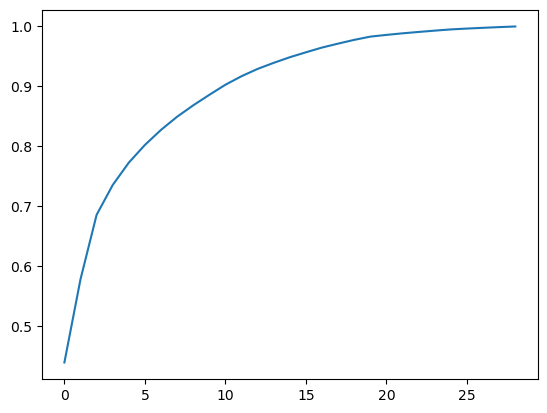

In [1204]:
# Deciding how many principal components I should keep.
# Looking at this chart I can keep I want to keep atleast 90% of my principal components
pd.Series(ex_var_ratio.cumsum()).plot(kind='line');

In [1205]:
# Grabbing 95% principal components
steps = [('preprocessing', col_transformer),
        ('pca', PCA(.95))]
scaled_pipe = Pipeline(steps=steps)

In [1206]:
pca_fit_trans = scaled_pipe.fit_transform(final)

In [1207]:
# Convert it into a dataframe and add the columns from the num features so we can have a better understanding of the values
pca_df = pd.DataFrame(scaled_pipe.steps[1][1].components_, columns=num_features)
pca_df

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,STL,BLK,TOV,PF,PTS,AvgPt,ORtg,DRtg,NRtg,Usg%
0,0.257746,0.261951,0.255774,0.098694,0.151252,0.155042,0.053607,0.244647,0.243397,0.069570,...,0.209439,0.138061,0.233179,0.223220,0.261036,0.229364,0.120843,-0.021613,0.129280,0.144647
1,-0.055289,-0.064761,-0.120539,0.369738,-0.134083,-0.156517,0.099650,-0.015431,-0.064917,0.393488,...,-0.076767,0.137762,-0.122598,0.022328,-0.079875,-0.082162,0.283120,-0.030866,0.293370,-0.166169
2,0.000405,-0.004977,-0.038063,0.110604,-0.341800,-0.322040,-0.320572,0.114233,0.106838,0.028972,...,0.002862,0.242332,0.047000,0.145428,-0.038055,-0.091693,-0.293074,-0.268446,-0.184568,-0.058229
3,0.164933,-0.075259,-0.032222,-0.205045,0.304240,0.297643,0.169591,-0.177573,-0.170743,-0.100126,...,0.205804,0.238472,-0.057508,0.230769,-0.066718,-0.231185,-0.046827,-0.008117,-0.040559,-0.450512
4,0.057816,-0.045379,-0.048984,-0.040239,-0.118039,-0.133106,0.197183,-0.023414,0.002540,-0.249413,...,0.179806,-0.116916,0.060411,0.027485,-0.047250,-0.073957,0.151555,-0.717648,0.434999,-0.074478
5,0.108468,-0.009382,-0.007589,-0.033656,-0.101729,-0.055333,-0.522550,-0.015280,-0.030681,0.213034,...,0.321009,-0.168528,0.162723,0.077321,-0.010686,-0.115964,0.212338,0.231152,0.126780,-0.277079
6,0.011241,0.085458,0.072665,0.137781,0.103494,0.075591,0.366174,0.011967,0.020773,0.052556,...,0.072089,-0.148680,0.118419,0.014802,0.068062,0.028327,-0.189566,-0.104258,-0.152570,0.040503
7,-0.036182,0.040820,0.091942,0.026173,0.251583,0.286769,-0.425209,-0.101619,-0.097996,0.248630,...,0.093645,0.159231,-0.095219,-0.123717,0.034943,0.146795,-0.057367,-0.370743,0.083391,0.407026
8,-0.044753,-0.006396,-0.020350,0.147314,-0.164395,-0.186265,0.269915,0.085752,0.105065,-0.183077,...,0.028995,0.182405,0.078495,-0.120562,-0.076304,0.102261,0.124297,0.240169,0.037657,0.256381
9,-0.024730,-0.001951,-0.002182,-0.286901,0.036883,0.048954,-0.072698,0.023047,0.007449,-0.199215,...,-0.088901,0.132398,-0.233009,-0.138912,0.016606,0.136512,0.431341,0.187498,0.364360,0.072475


## 5.3 KMeans
<strong>Implement the KMeans model to create my own labels</strong> 

In [1208]:
# Add the kmeans model into my pipeline
steps = [('preprocessing', col_transformer),
        ('pca', PCA(.95)),
        ('k_means', KMeans())]
k_pipe = Pipeline(steps=steps)

In [1209]:
k_df = k_pipe.fit_transform(final)

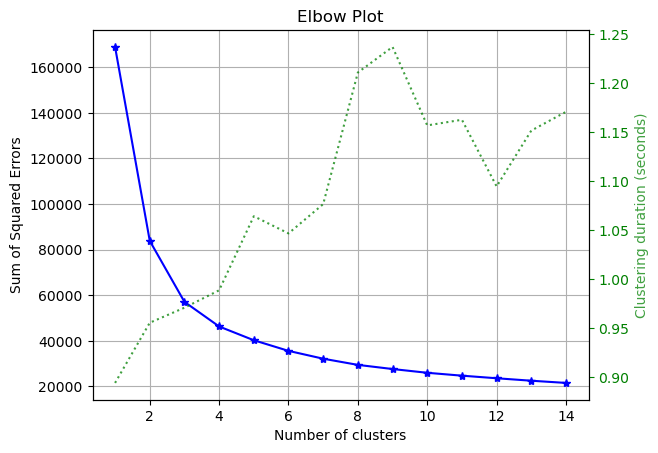

In [1210]:
# Using the elbow plot I can determine how many clusters I can use and by the looks of it, 3-6 clusters seems optimal
k_model = k_pipe.steps[2][1]

plot_elbow_curve(k_model, k_df, cluster_ranges=range(1, 15));

In [1211]:
# I am comparing the silhouette scores between 4 - 6 clusters
steps = [('preprocessing', col_transformer),
        ('pca', PCA(.95)),
        ('k_means', KMeans(3, random_state=1))]
cluster_pipe = Pipeline(steps=steps)

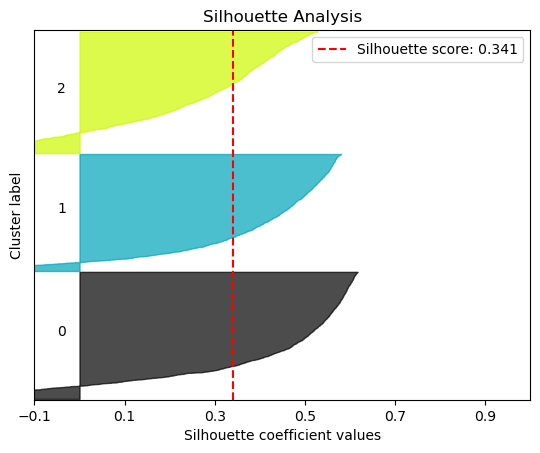

In [1212]:
cluster_model = cluster_pipe.fit_transform(final)

plot_silhouette(cluster_model, cluster_pipe.steps[2][1].labels_);

In [1213]:
steps = [('preprocessing', col_transformer),
        ('pca', PCA(.95)),
        ('k_means', KMeans(4, random_state=1))]
cluster_pipe2 = Pipeline(steps=steps)

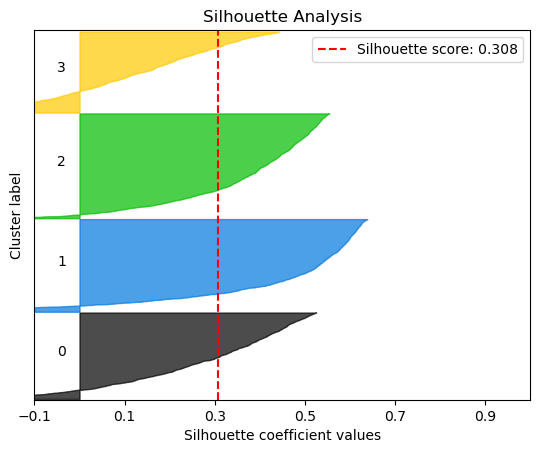

In [1214]:
cluster_model2 = cluster_pipe2.fit_transform(final)

plot_silhouette(cluster_model2, cluster_pipe2.steps[2][1].labels_);

In [1215]:
steps = [('preprocessing', col_transformer),
        ('pca', PCA(.95)),
        ('k_means', KMeans(5, random_state=1))]
cluster_pipe3 = Pipeline(steps=steps)

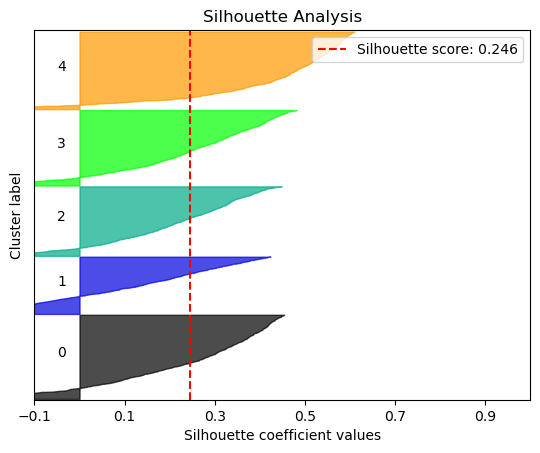

In [1216]:
cluster_model3 = cluster_pipe3.fit_transform(final)

plot_silhouette(cluster_model3, cluster_pipe3.steps[2][1].labels_);

In [1217]:
steps = [('preprocessing', col_transformer),
        ('pca', PCA(.95)),
        ('k_means', KMeans(6, random_state=1))]
cluster_pipe4 = Pipeline(steps=steps)

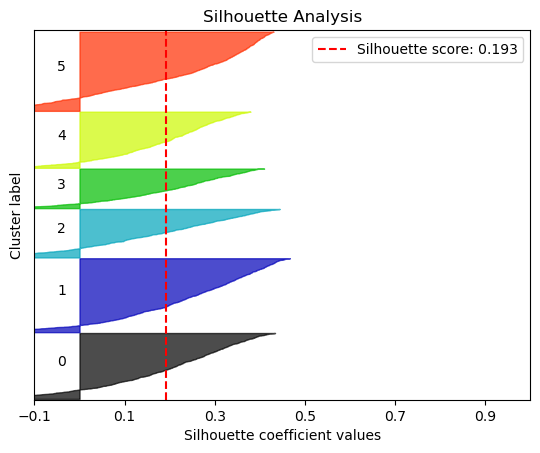

In [1218]:
cluster_model4 = cluster_pipe4.fit_transform(final)

plot_silhouette(cluster_model4, cluster_pipe4.steps[2][1].labels_);

<strong>Although 4 has a better silhoutte score I want to categorize the players into 6 clusters</strong>

## 5.4 Getting the labels

In [1219]:
steps = [('preprocessing', col_transformer),
        ('pca', PCA(.95)),
        ('k_means', KMeans(6, random_state=1))]
label_pipe = Pipeline(steps=steps)

In [1220]:
cluster_fit_trans = label_pipe.fit_transform(final)

In [1221]:
final['label'] = label_pipe.steps[2][1].labels_

In [1222]:
# This seems to have a good distribution of players and will have to categorize them by which type of player they are
final.groupby('label').agg({'Player': 'count'})

,Player
label,
0,852
1,955
2,626
3,511
4,725
5,1022


In [1378]:
list(set(final.columns) - set(players.columns))

['Pos', 'label', 'Tm']

In [1370]:
final.columns

Index(['Tm', 'SZN', 'Player', 'Pos', 'Age', 'G', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'TS%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'AvgPt', 'MaxG_opp', 'ORtg', 'DRtg', 'NRtg', 'Usg%', 'label'],
      dtype='object')

In [1369]:
players.columns

Index(['Player', 'SZN', 'Age', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'TS%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AvgPt',
       'MaxG_opp', 'ORtg', 'DRtg', 'NRtg', 'Usg%'],
      dtype='object')

In [1345]:
final[final['Player'] == 'Alex Caruso']

,Tm,SZN,Player,Pos,Age,G,MP,FG,FGA,FG%,...,TOV,PF,PTS,AvgPt,MaxG_opp,ORtg,DRtg,NRtg,Usg%,label
3329,LAL,2018,Alex Caruso,PG,23,37,562,50,116,0.431,...,42,52,134,3.621622,82,106.718581,122.226781,-15.508200,12.978665,3
3944,LAL,2019,Alex Caruso,PG,24,25,531,77,173,0.445,...,42,54,229,9.160000,82,119.222633,123.284305,-4.061672,19.047212,1
4561,LAL,2020,Alex Caruso,PG,25,64,1175,120,291,0.412,...,53,98,349,5.453125,72,203.148882,42.960283,160.188598,13.889437,4
5157,LAL,2021,Alex Caruso,PG,26,58,1216,133,305,0.436,...,76,108,370,6.379310,72,115.604985,119.866184,-4.261200,14.881375,4
5783,CHI,2022,Alex Caruso,SG,27,41,1147,102,256,0.398,...,57,106,304,7.414634,82,118.962416,125.461346,-6.498930,13.343490,4


In [1348]:
#final.groupby('Player')['label'].transform('mean').apply(np.floor)

1       4.0
4       1.0
5       0.0
6       2.0
7       4.0
       ... 
6385    0.0
6386    4.0
6387    2.0
6388    1.0
6389    1.0
Name: label, Length: 4691, dtype: float64

In [1360]:
players = final.groupby('Player')[final.columns].mean().reset_index()

In [1362]:
players = players.drop(columns='label')

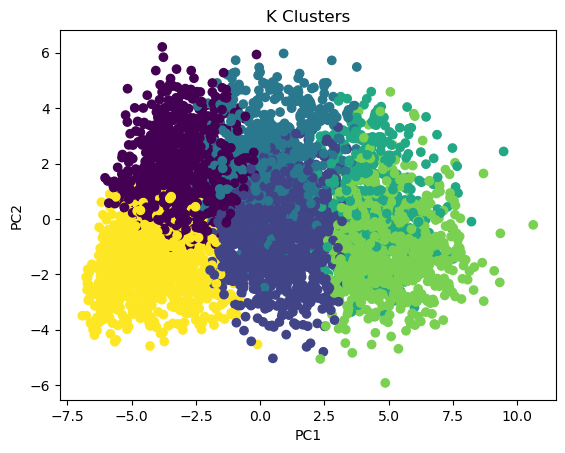

In [1225]:
plt.scatter(x=pca_fit_trans[:,0], y=pca_fit_trans[:,1], c=final['label'])
plt.title('K Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

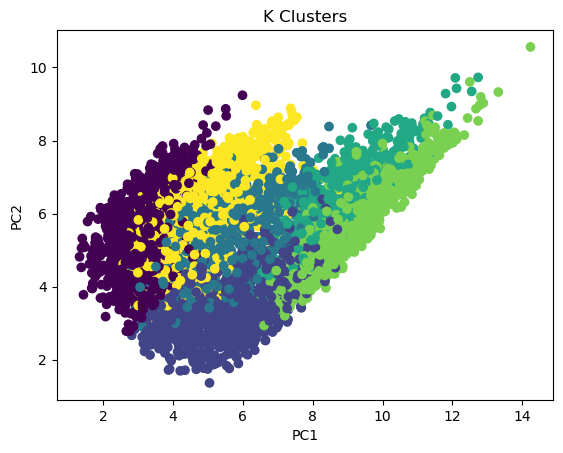

In [1226]:
plt.scatter(x=cluster_fit_trans[:,0], y=cluster_fit_trans[:,1], c=label_pipe.steps[2][1].labels_)
plt.title('K Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1384]:
players

,Player,SZN,Age,G,MP,FG,FGA,FG%,3P,3PA,...,BLK,TOV,PF,PTS,AvgPt,MaxG_opp,ORtg,DRtg,NRtg,Usg%
0,A.J. Hammons,2017.000000,24.000000,22.000000,163.000000,17.000000,42.000000,0.405000,5.000000,10.000000,...,13.000000,10.000000,21.000000,48.000000,2.181818,82.000000,89.468188,122.006197,-32.538008,17.697352
1,A.J. Price,2013.000000,26.000000,43.000000,648.333333,79.666667,211.000000,0.380667,34.000000,103.333333,...,1.666667,34.333333,36.000000,219.000000,4.405787,76.666667,110.353139,118.704114,-8.350974,19.714537
2,Aaron Brooks,2015.285714,30.285714,52.285714,941.714286,150.428571,362.714286,0.413000,55.714286,147.428571,...,7.714286,70.857143,96.714286,407.571429,7.555533,82.000000,114.754747,123.016419,-8.261672,20.986240
3,Aaron Gordon,2018.777778,22.777778,58.666667,1697.444444,289.444444,629.222222,0.461222,65.222222,202.111111,...,37.222222,88.000000,117.000000,765.222222,12.763711,78.666667,124.920953,115.194543,9.726410,20.209650
4,Aaron Gray,2013.000000,28.000000,41.333333,553.666667,52.000000,103.000000,0.493333,0.000000,0.333333,...,10.000000,38.000000,89.666667,123.333333,2.849825,76.666667,98.102610,116.741736,-18.639126,13.022795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,Zach Randolph,2015.000000,33.000000,64.857143,1951.571429,406.000000,867.571429,0.467714,13.000000,48.285714,...,15.000000,121.285714,146.142857,990.428571,14.902917,79.714286,110.327214,116.006066,-5.678852,25.472589
1095,Zaza Pachulia,2015.500000,30.500000,64.875000,1368.875000,161.125000,336.500000,0.482125,0.000000,2.125000,...,20.625000,88.875000,151.750000,436.375000,6.712442,80.000000,110.083931,116.055646,-5.971715,16.112852
1096,Zeke Nnaji,2021.500000,20.500000,41.500000,547.500000,73.000000,145.000000,0.498500,30.500000,69.500000,...,8.500000,15.000000,54.000000,203.000000,4.911731,77.000000,126.521600,127.620104,-1.098504,14.015258
1097,Ziaire Williams,2022.000000,20.000000,62.000000,1346.000000,191.000000,424.000000,0.450000,76.000000,242.000000,...,12.000000,41.000000,113.000000,501.000000,8.080645,82.000000,124.701577,126.209803,-1.508226,14.983065


In [1385]:
# Drop columns
drop_features = ['SZN', 'Player', 'Age', 'G', 'MaxG_opp']

# Numeric columns
num_features = ['MP','FG', 'FGA', 'FG%', '3P', '3PA','3P%','2P','2PA','2P%','eFG%','TS%','FT','FTA','FT%','ORB','DRB','TRB',\
              'AST','STL','BLK','TOV','PF','PTS','AvgPt','ORtg','DRtg','NRtg','Usg%']

In [1386]:
steps = [('preprocessing', col_transformer),
        ('k_means', KMeans(6, n_init=20, random_state=1))]
label_pipe = Pipeline(steps=steps)

In [1387]:
x = label_pipe.fit_transform(players)

ValueError: A given column is not a column of the dataframe

In [1279]:
y = label_pipe.steps[1][1].labels_

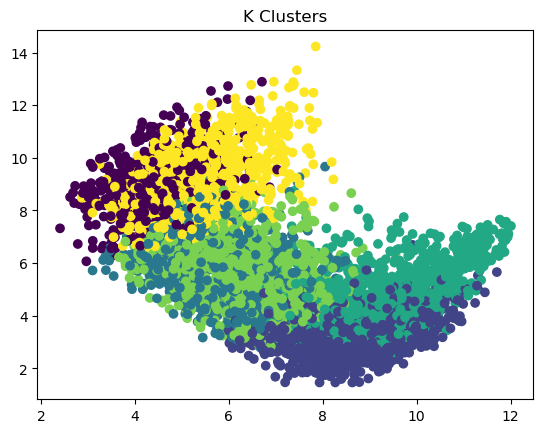

In [1285]:
plt.scatter(x=x[:,0], y=x[:,1], c=final['label'])
plt.title('K Clusters')
plt.show()

In [1341]:
dfs = []

for i in range(6):
    dfs.append(pd.DataFrame(final.loc[final['label']== i].describe().loc['mean',['ORtg', 'DRtg', 'NRtg']]))

result = pd.concat(dfs, axis=1)
result.columns=['0', '1', '2', '3', '4', '5']
result

,0,1,2,3,4,5
ORtg,121.833334,130.536472,126.127929,108.341251,128.762293,133.278758
DRtg,114.172441,114.629399,112.158384,116.471230,115.003723,114.335328
NRtg,7.660893,15.940906,13.969544,-8.098080,13.758570,18.943431


In [1320]:
pd.DataFrame(final.loc[final['label']== 1].describe().loc['mean',['AvgPt', 'ORtg', 'DRtg', 'Usg%', 'label']])

,mean
AvgPt,5.896587
ORtg,130.536472
DRtg,114.629399
Usg%,16.263225
label,1.000000


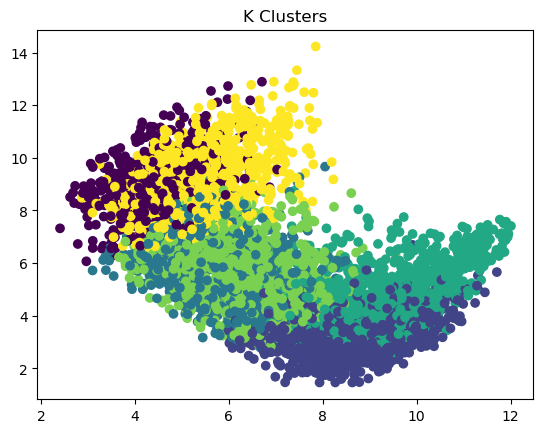

In [1285]:
plt.scatter(x=x[:,0], y=x[:,1], c=final['label'])
plt.title('K Clusters')
plt.show()